In [ ]:
!pip install --quiet torch torchvision captum matplotlib==3.3.4 Flask-Compress

In [1]:
import sys
sys.path.insert(1, '../')

In [2]:
import helpers, os

## Load in Model

In [3]:
models_base_pth = "/home/local/data/sophie/padcxr14_models/step_decay_cxr14/arch_seg/"
full_config_path = "full_network/{}/lr_step_decay_10_epochs_0.1_rate/model_lr_0.0005_bsz_16_mom_0.99_seed_{}_pos-weight_1.0.pth/model_17.pth"

full_base_model_1 = helpers.models.load_trained_resnet50(os.path.join(models_base_pth,full_config_path.format("base","42")),device="cpu")
full_base_model_2 = helpers.models.load_trained_resnet50(os.path.join(models_base_pth,full_config_path.format("base","43")),device="cpu")
full_base_model_3 = helpers.models.load_trained_resnet50(os.path.join(models_base_pth,full_config_path.format("base","44")),device="cpu")

full_grey_model_1 = helpers.models.load_trained_resnet50(os.path.join(models_base_pth,full_config_path.format("grey","42")),device="cpu")
full_grey_model_2 = helpers.models.load_trained_resnet50(os.path.join(models_base_pth,full_config_path.format("grey","43")),device="cpu")
full_grey_model_3 = helpers.models.load_trained_resnet50(os.path.join(models_base_pth,full_config_path.format("grey","44")),device="cpu")

full_single_model_1 = helpers.models.load_trained_resnet50(os.path.join(models_base_pth,full_config_path.format("single","42")),single=True, device="cpu")
full_single_model_2 = helpers.models.load_trained_resnet50(os.path.join(models_base_pth,full_config_path.format("single","43")),single=True, device="cpu")
full_single_model_3 = helpers.models.load_trained_resnet50(os.path.join(models_base_pth,full_config_path.format("single","44")),single=True, device="cpu")


In [4]:
half_config_path = "half_network/{}/lr_step_decay_10_epochs_0.1_rate/model_lr_0.01_bsz_16_mom_0.9_seed_{}_pos-weight_1.0.pth/model_17.pth"

half_base_model_1 = helpers.models.load_trained_resnet50(os.path.join(models_base_pth,half_config_path.format("base","42")),device="cpu")
half_base_model_2 = helpers.models.load_trained_resnet50(os.path.join(models_base_pth,half_config_path.format("base","43")),device="cpu")
half_base_model_3 = helpers.models.load_trained_resnet50(os.path.join(models_base_pth,half_config_path.format("base","44")),device="cpu")

half_grey_model_1 = helpers.models.load_trained_resnet50(os.path.join(models_base_pth,half_config_path.format("grey","42")),device="cpu")
half_grey_model_2 = helpers.models.load_trained_resnet50(os.path.join(models_base_pth,half_config_path.format("grey","43")),device="cpu")
half_grey_model_3 = helpers.models.load_trained_resnet50(os.path.join(models_base_pth,half_config_path.format("grey","44")),device="cpu")

half_single_model_1 = helpers.models.load_trained_resnet50(os.path.join(models_base_pth,half_config_path.format("single","42")),single=True, device="cpu")
half_single_model_2 = helpers.models.load_trained_resnet50(os.path.join(models_base_pth,half_config_path.format("single","43")),single=True, device="cpu")
half_single_model_3 = helpers.models.load_trained_resnet50(os.path.join(models_base_pth,half_config_path.format("single","44")),single=True, device="cpu")


In [5]:
first_config_path = "first_layer_freeze/{}/lr_step_decay_10_epochs_0.1_rate/model_lr_0.0005_bsz_16_mom_0.99_seed_{}_pos-weight_1.0.pth/model_17.pth"

first_base_model_1 = helpers.models.load_trained_resnet50(os.path.join(models_base_pth,first_config_path.format("base","42")),device="cpu")
first_base_model_2 = helpers.models.load_trained_resnet50(os.path.join(models_base_pth,first_config_path.format("base","43")),device="cpu")
first_base_model_3 = helpers.models.load_trained_resnet50(os.path.join(models_base_pth,first_config_path.format("base","44")),device="cpu")

first_grey_model_1 = helpers.models.load_trained_resnet50(os.path.join(models_base_pth,first_config_path.format("grey","42")),device="cpu")
first_grey_model_2 = helpers.models.load_trained_resnet50(os.path.join(models_base_pth,first_config_path.format("grey","43")),device="cpu")
first_grey_model_3 = helpers.models.load_trained_resnet50(os.path.join(models_base_pth,first_config_path.format("grey","44")),device="cpu")

first_single_model_1 = helpers.models.load_trained_resnet50(os.path.join(models_base_pth,first_config_path.format("single","42")),single=True, device="cpu")
first_single_model_2 = helpers.models.load_trained_resnet50(os.path.join(models_base_pth,first_config_path.format("single","43")),single=True, device="cpu")
first_single_model_3 = helpers.models.load_trained_resnet50(os.path.join(models_base_pth,first_config_path.format("single","44")),single=True, device="cpu")


## Load in Data

In [6]:
data_root = "/home/local/data/sophie/node21_combined"
dataset_name = "cxr14"
process = "arch"
std_dir = "std_1024"
crop_size = 512

bbox_df = helpers.bboxes.read_bounding_boxes("/home/local/data/sophie/node21_combined/all_bboxes.csv")
device = helpers.models.get_device()

In [7]:
cxr_test = helpers.dataloading.load_dataset_with_paths(
    dataset_path=os.path.join(data_root, dataset_name, "test"),
    dataset_name=dataset_name,
    process='arch',
    crop_size=512,
    batch_size=4,
    shuffle=False
)
cxr_test_single = helpers.dataloading.load_dataset_with_paths(
    dataset_path=os.path.join(data_root, dataset_name, "test"),
    dataset_name=dataset_name,
    process='arch',
    crop_size=512,
    batch_size=4,
    shuffle=False,
    single_channel=True
)

In [8]:
pad_test = helpers.dataloading.load_dataset_with_paths(
    dataset_path=os.path.join(data_root, "padchest", "test"),
    dataset_name="padchest",
    process='arch',
    crop_size=512,
    batch_size=4,
    shuffle=False
)

openi_test = helpers.dataloading.load_dataset_with_paths(
    dataset_path=os.path.join(data_root, "openi", "test"),
    dataset_name="openi",
    process='arch',
    crop_size=512,
    batch_size=4,
    shuffle=False
)
jsrt_test = helpers.dataloading.load_dataset_with_paths(
    dataset_path=os.path.join(data_root, "jsrt", "test"),
    dataset_name="jsrt",
    process='arch',
    crop_size=512,
    batch_size=4,
    shuffle=False
)

## Generate Explainability Plots

In [9]:
import gc

# def init_and_viz_intgrad(model, input_img, idx_label, bbox=None, single=False):
def init_and_viz_intgrad_occlusion(model, input_img, idx_label, bbox=None, single=False, baseline=0, window=15):
    #methods: riemann_right, riemann_left, riemann_middle, riemann_trapezoid or gausslegendre
    int_model = helpers.explainability.make_int_grad_model(model)
    int_attrs = helpers.explainability.get_occ_int_grad_for_single_tensor(
        int_model,
        input_img,
        idx_label,
        single=single,
        window=window
    )
    # clean up memory
    del int_model
    gc.collect()
    
    occ_model = helpers.explainability.make_occ_int_grad_model(model)
    occ_attrs = helpers.explainability.get_occ_int_grad_for_single_tensor(
        occ_model,
        input_img,
        idx_label,
        single=single,
        window=window
    )
    del occ_model
    gc.collect()
    if single:
        int_attrs = int_attrs.expand(3, *int_attrs.shape[1:])
        occ_attrs = occ_attrs.expand(3, *occ_attrs.shape[1:])
        input_img = input_img.expand(3, *input_img.shape[1:])
    helpers.explainability.plot_ig_and_mask(
        attrs = [int_attrs, occ_attrs, occ_attrs, occ_attrs],
        img_tensor = input_img,
        bbox = bbox if bbox else None,
        single=single
    )

### Generate mini batch

In [10]:
# grab a batch
inputs, labels, paths = next(iter(cxr_test))
inputs = inputs.to(device)
labels = labels.to(device)

In [11]:
single_inputs, single_labels, single_paths = next(iter(cxr_test_single))
single_inputs = single_inputs.to(device)
single_labels = single_labels.to(device)

In [12]:
import numpy as np
i = 0
for data in cxr_test:
    pos_inputs, pos_labels = data[0],data[1]
    pos_paths = np.array(data[2])
    i+= 1
    if labels.any() == 1:
        break
pos_inputs = pos_inputs.to(device)
pos_labels = pos_labels.to(device)

In [13]:
for data in cxr_test_single:
    pos_single_inputs, pos_single_labels = data[0],data[1]
    pos_single_paths = np.array(data[2])
    if labels.any() == 1:
        break

pos_single_inputs = pos_single_inputs.to(device)
pos_single_labels = pos_single_labels.to(device)

## Full Network

### Base Test

#### Model 1

##### Nodule

/opt/conda/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "dpi" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument

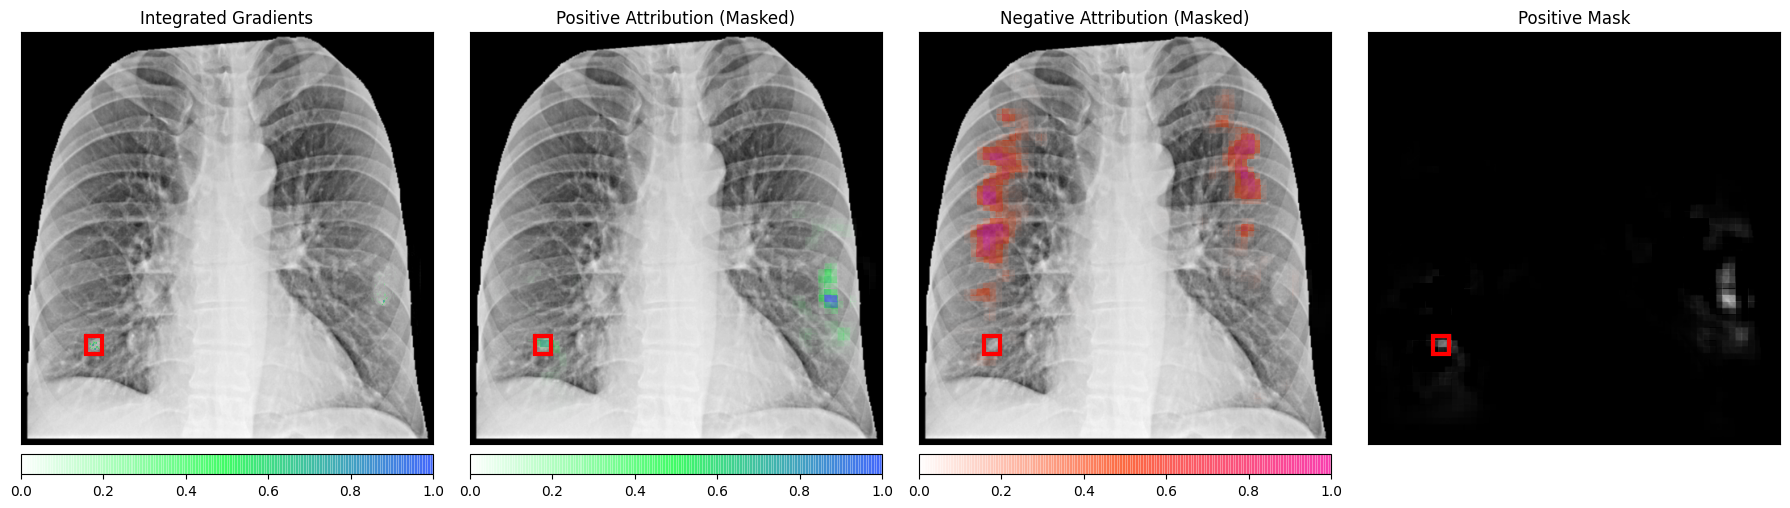

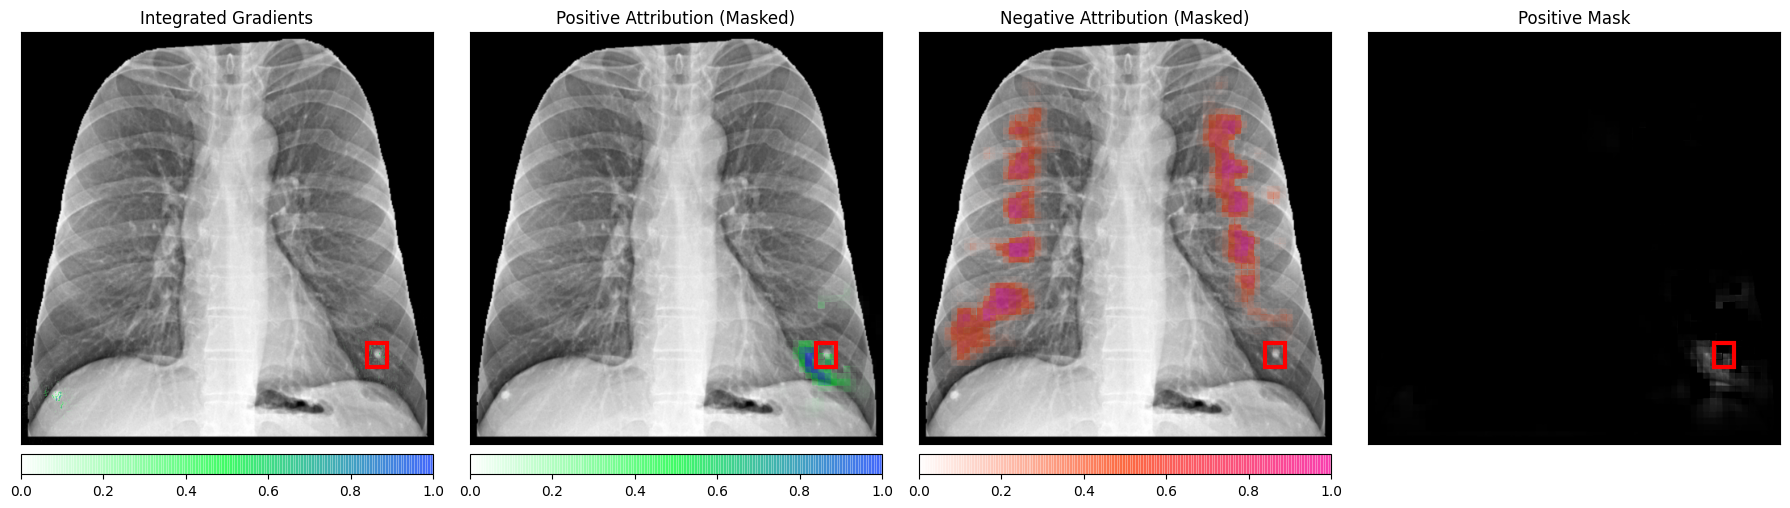

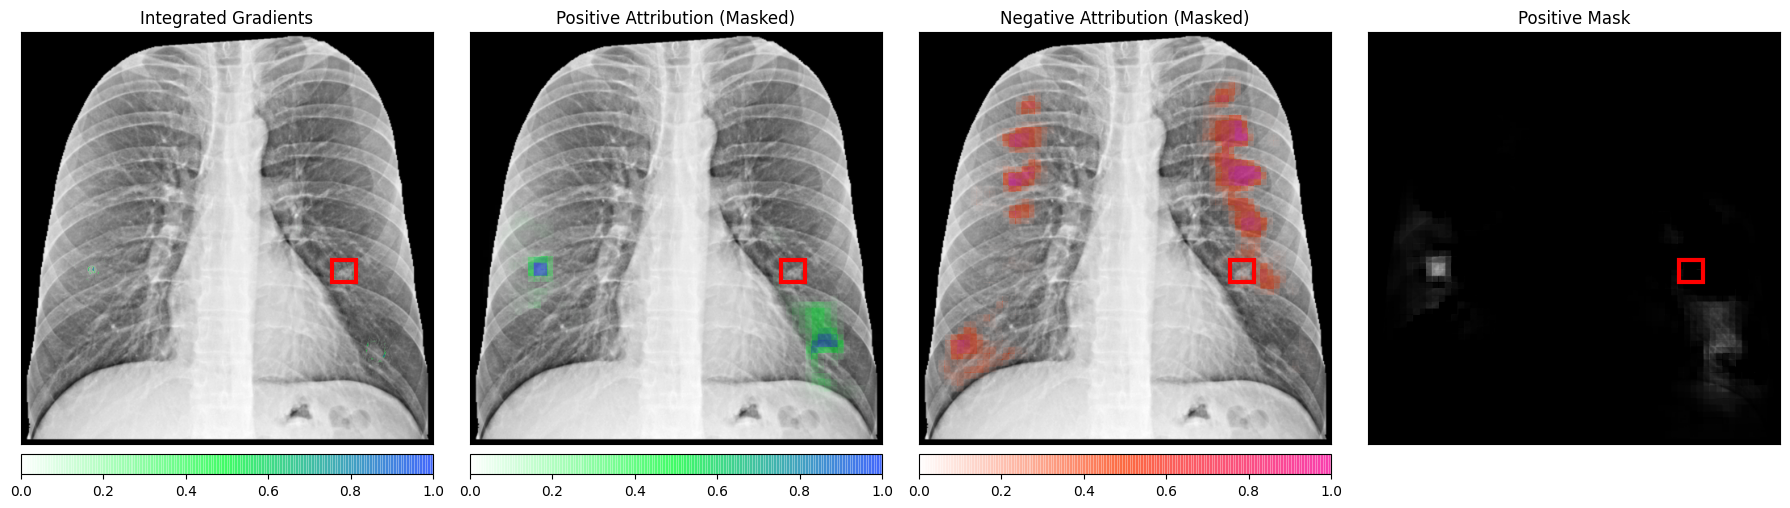

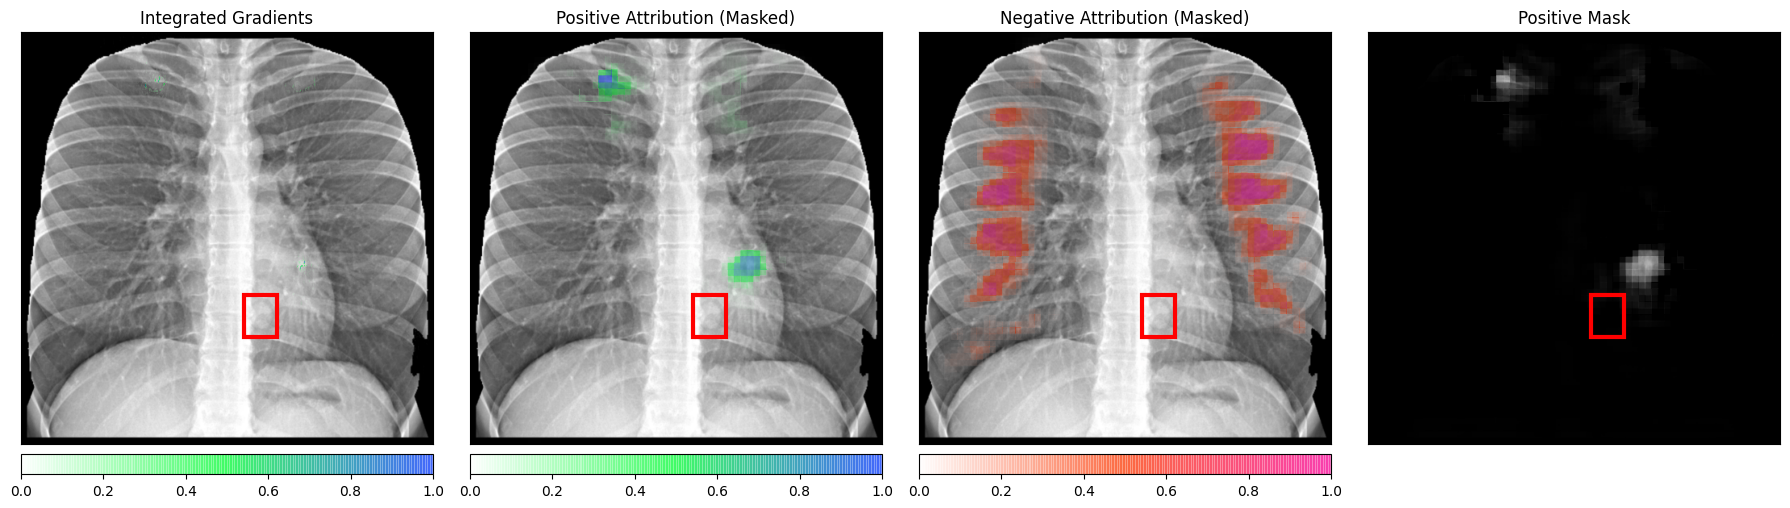

In [14]:
window = 15
full_base_model_1 = full_base_model_1.to(device)
for i in range(len(pos_paths)):
    pos_curr_label = 1 if "1" in pos_paths[i].split("/")[-2] else 0
    if pos_curr_label == 1:
        pos_curr_bbox = helpers.bboxes.resize_bboxes([bbox_df[pos_paths[i].split("/")[-1].split("_")[0]]],224,512)[0]
        init_and_viz_intgrad_occlusion(full_base_model_1, pos_inputs[i], pos_curr_label ,pos_curr_bbox, window=window)
    else:
        init_and_viz_intgrad_occlusion(full_base_model_1, pos_inputs[i], pos_curr_label, window=window)
full_base_model_1 = full_base_model_1.to("cpu")

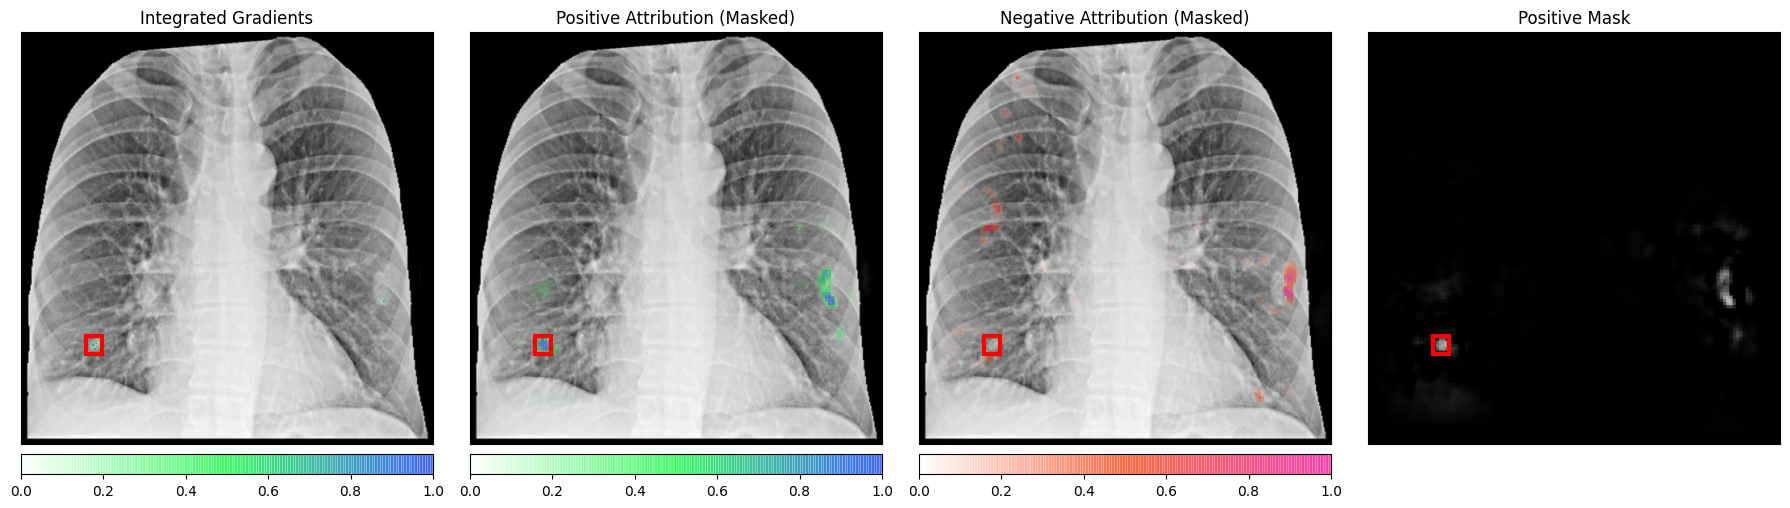

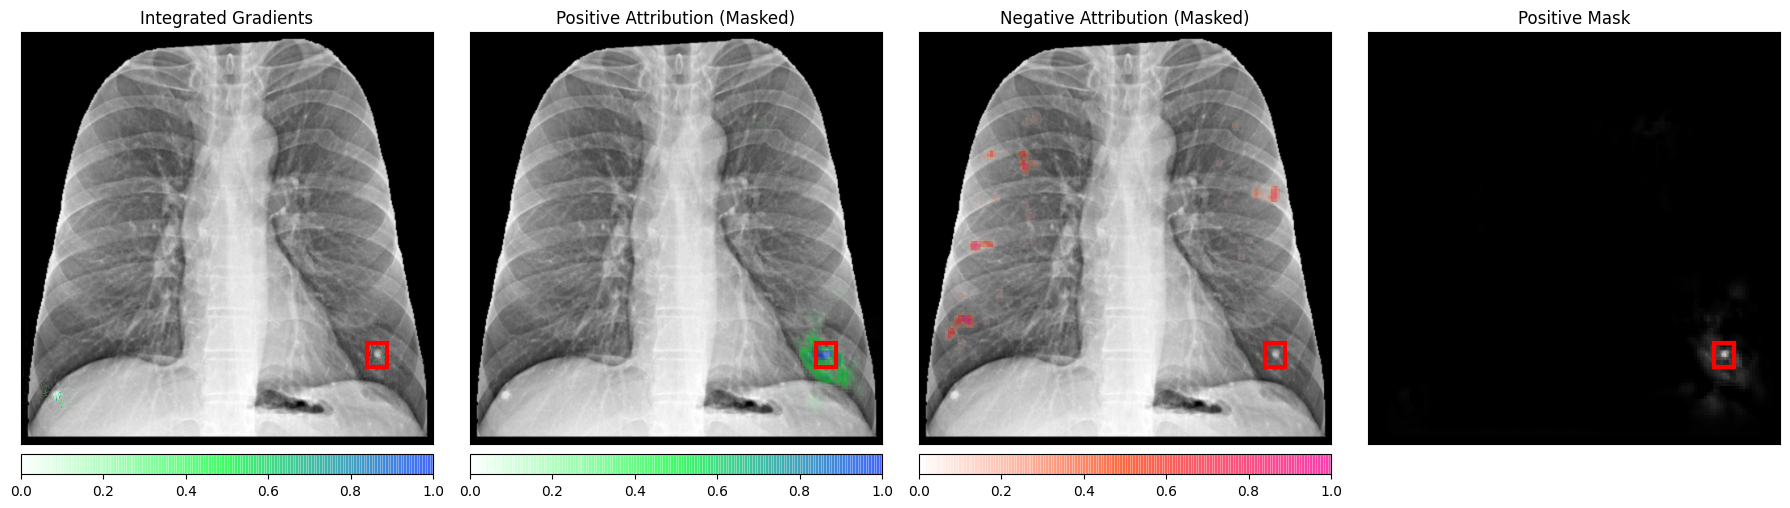

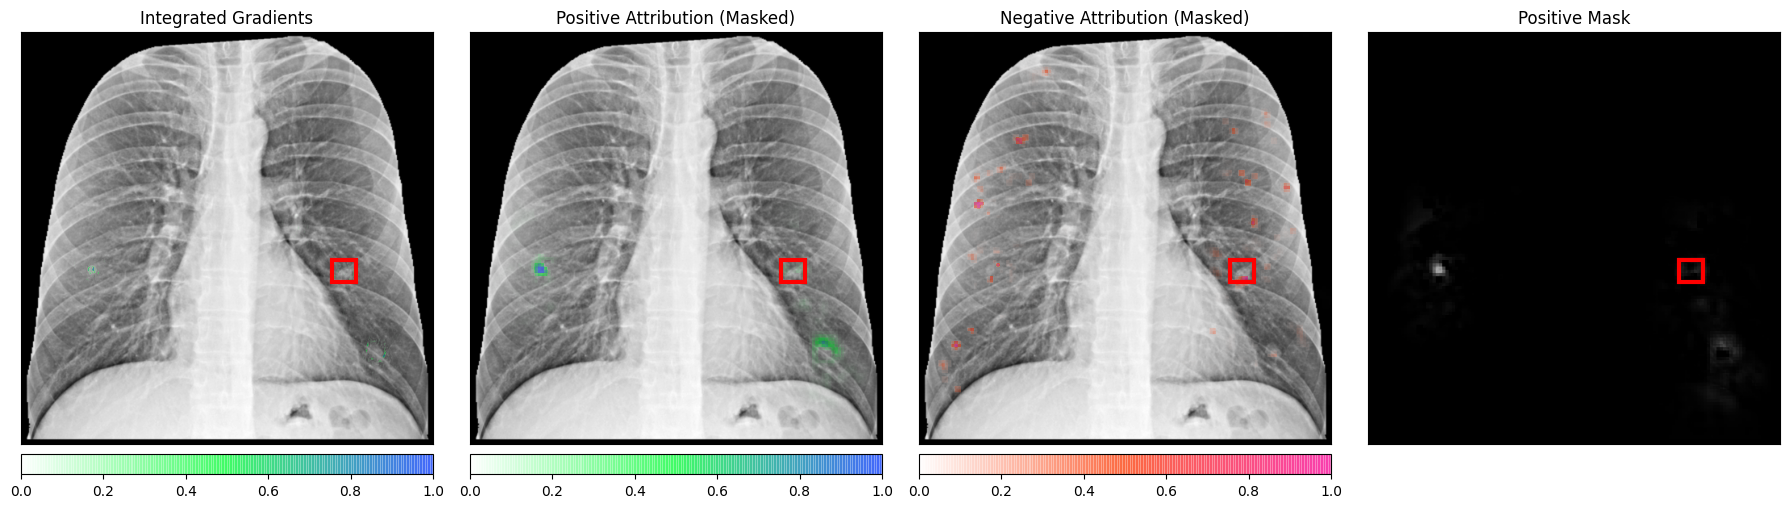

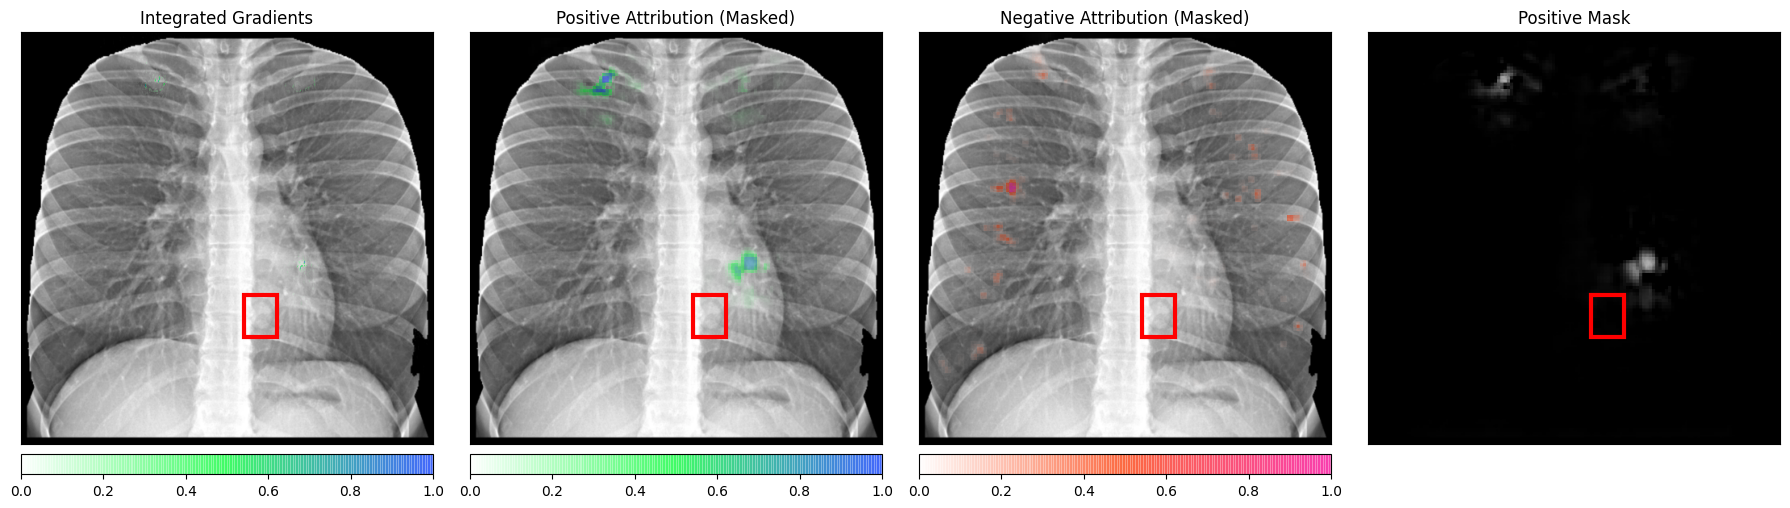

In [15]:
# dynamic stride
window = 8
full_base_model_1 = full_base_model_1.to(device)
for i in range(len(pos_paths)):
    pos_curr_label = 1 if "1" in pos_paths[i].split("/")[-2] else 0
    if pos_curr_label == 1:
        pos_curr_bbox = helpers.bboxes.resize_bboxes([bbox_df[pos_paths[i].split("/")[-1].split("_")[0]]],224,512)[0]
        init_and_viz_intgrad_occlusion(full_base_model_1, pos_inputs[i], pos_curr_label ,pos_curr_bbox, window=window)
    else:
        init_and_viz_intgrad_occlusion(full_base_model_1, pos_inputs[i], pos_curr_label, window=window)
full_base_model_1 = full_base_model_1.to("cpu")

##### Normal

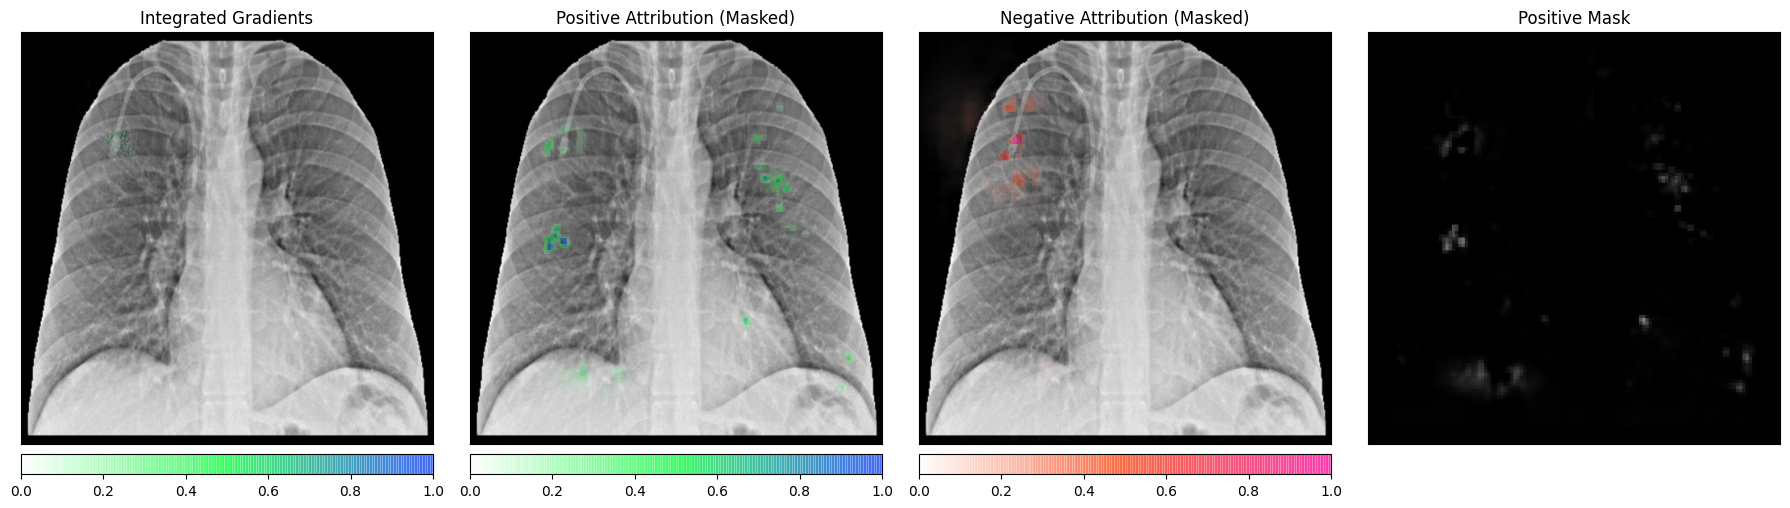

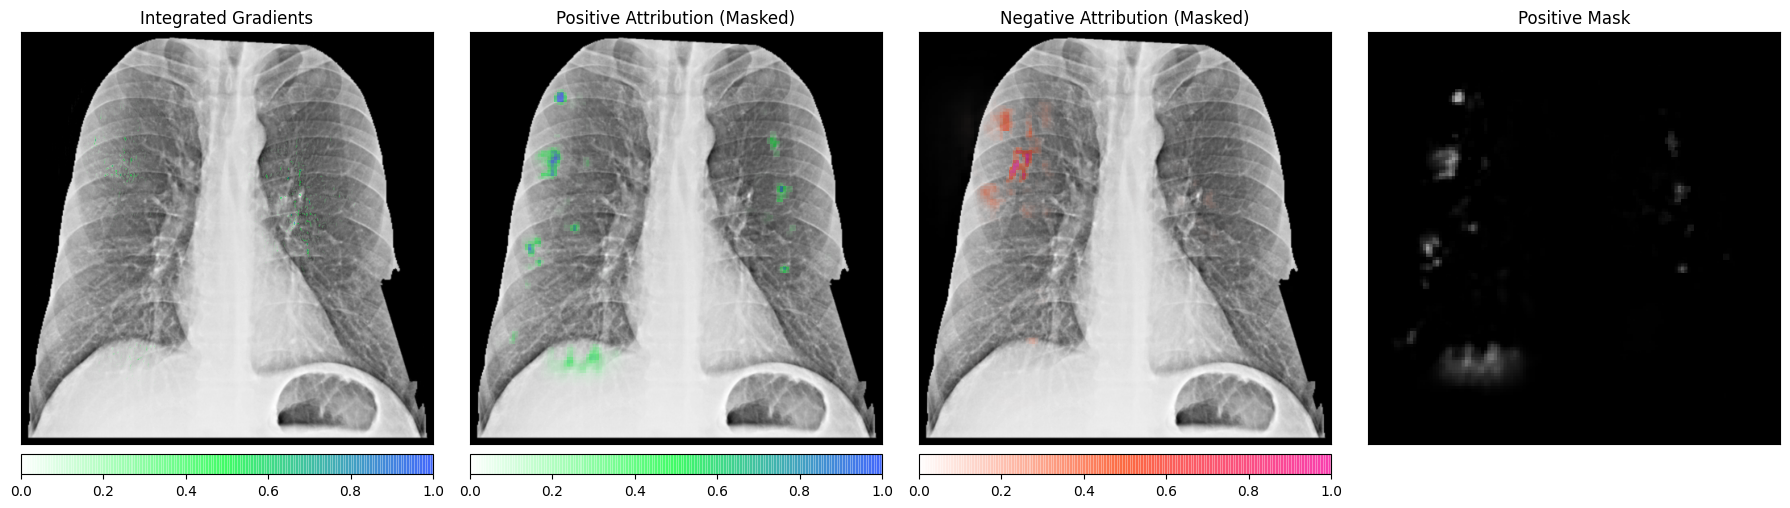

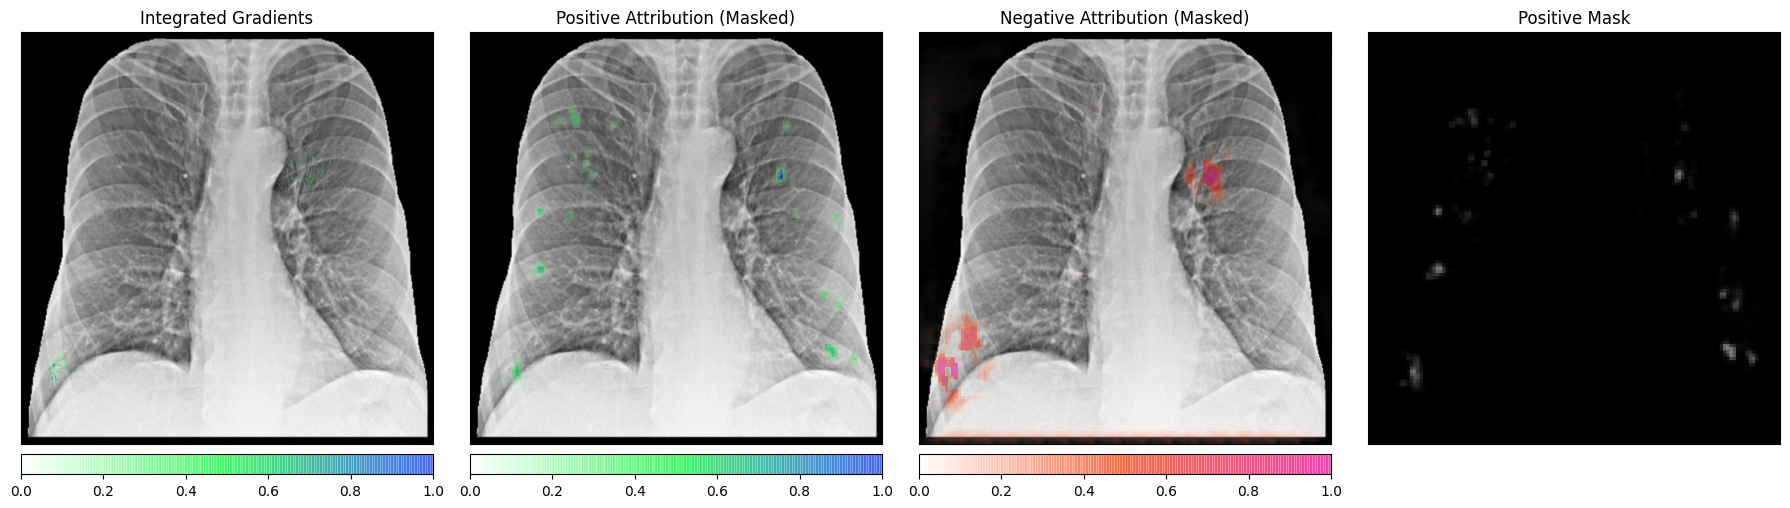

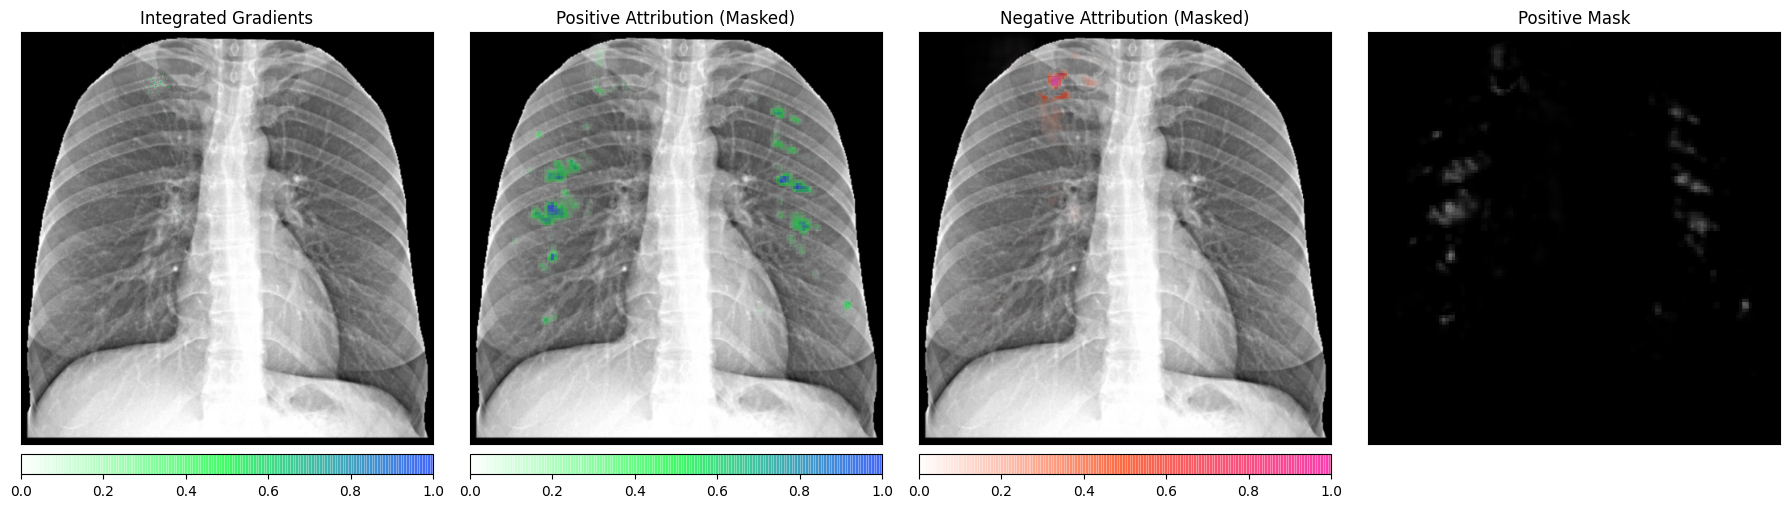

In [17]:
window=8
full_base_model_1 = full_base_model_1.to(device)
for i in range(len(paths)):
    curr_label = 1 if "1" in paths[i].split("/")[-2] else 0
    if curr_label == 1:
        curr_bbox = helpers.bboxes.resize_bboxes([bbox_df[paths[i].split("/")[-1].split("_")[0]]],224,512)[0]
        init_and_viz_intgrad_occlusion(full_base_model_1, inputs[i], curr_label ,curr_bbox, window=window)
    else:
        init_and_viz_intgrad_occlusion(full_base_model_1, inputs[i], curr_label, window=window)
full_base_model_1 = full_base_model_1.to("cpu")

#### Model 2

##### Nodule

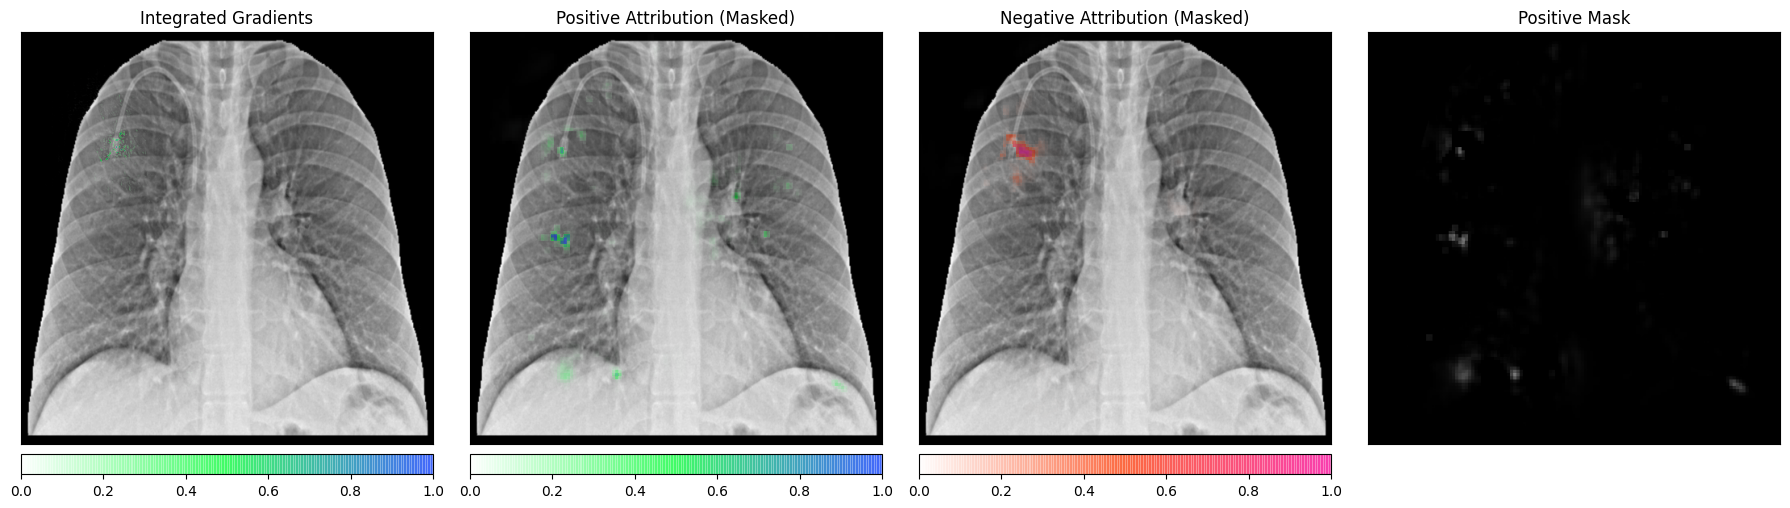

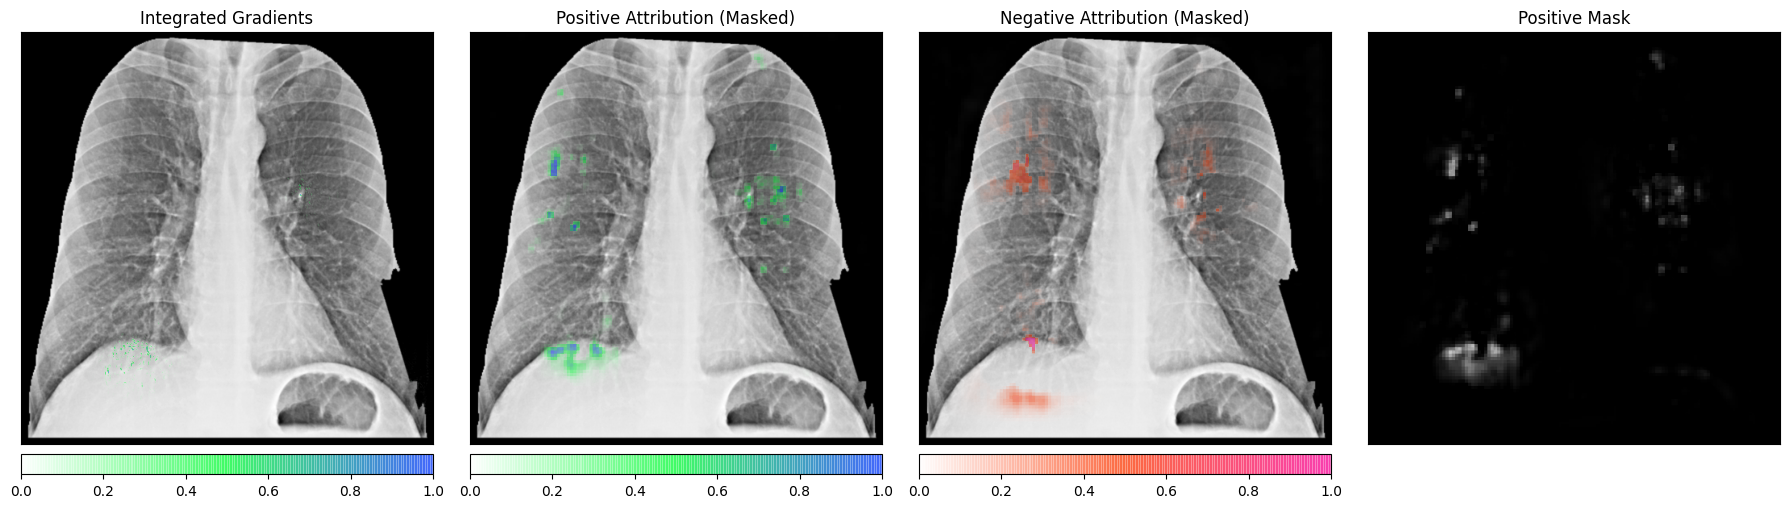

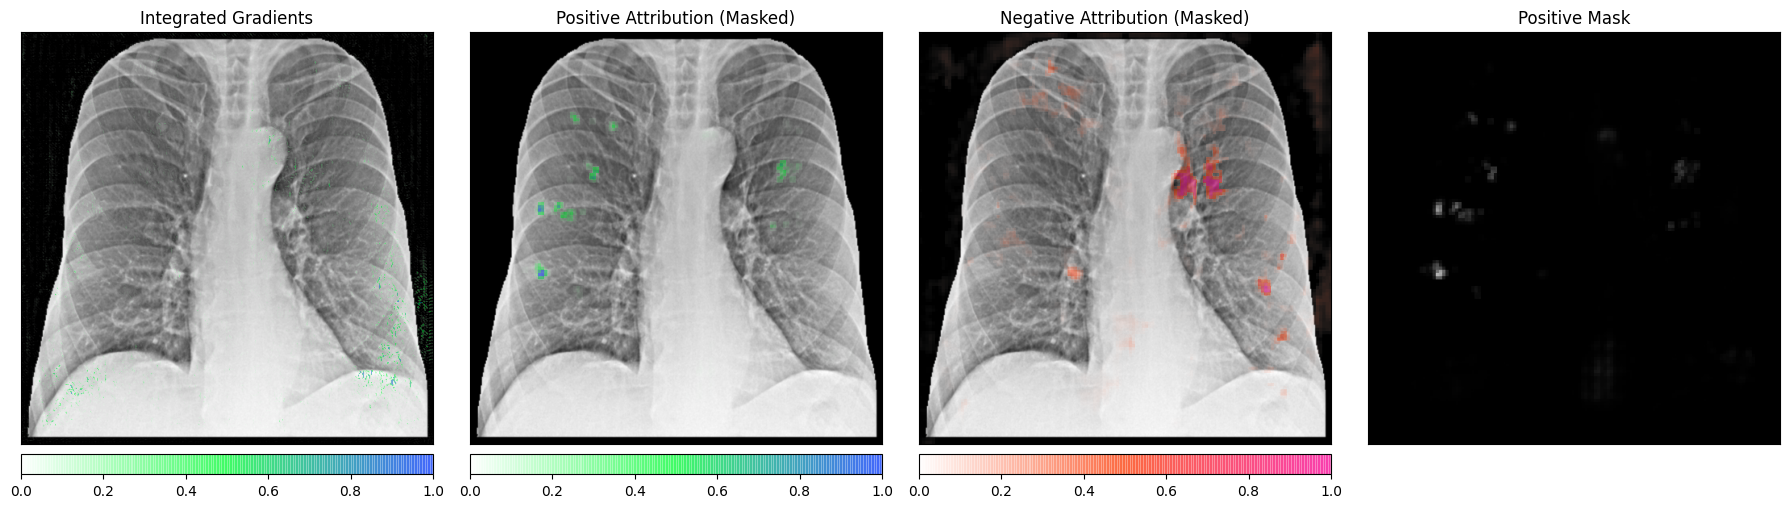

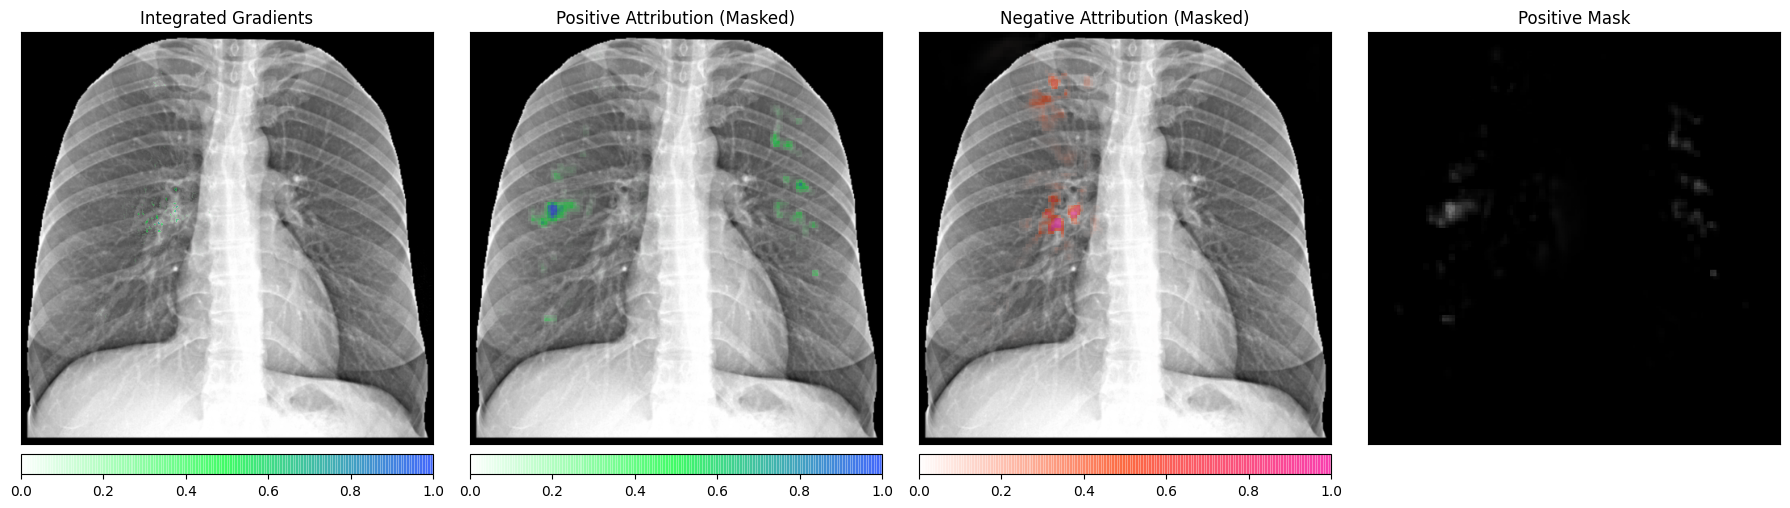

In [19]:
window=8
full_base_model_2 = full_base_model_2.to(device)
for i in range(len(paths)):
    curr_label = 1 if "1" in paths[i].split("/")[-2] else 0
    if curr_label == 1:
        curr_bbox = helpers.bboxes.resize_bboxes([bbox_df[paths[i].split("/")[-1].split("_")[0]]],224,512)[0]
        init_and_viz_intgrad_occlusion(full_base_model_2, inputs[i], curr_label ,curr_bbox, window=window)
    else:
        init_and_viz_intgrad_occlusion(full_base_model_2, inputs[i], curr_label, window=window)
full_base_model_2 = full_base_model_2.to("cpu")

##### Normal

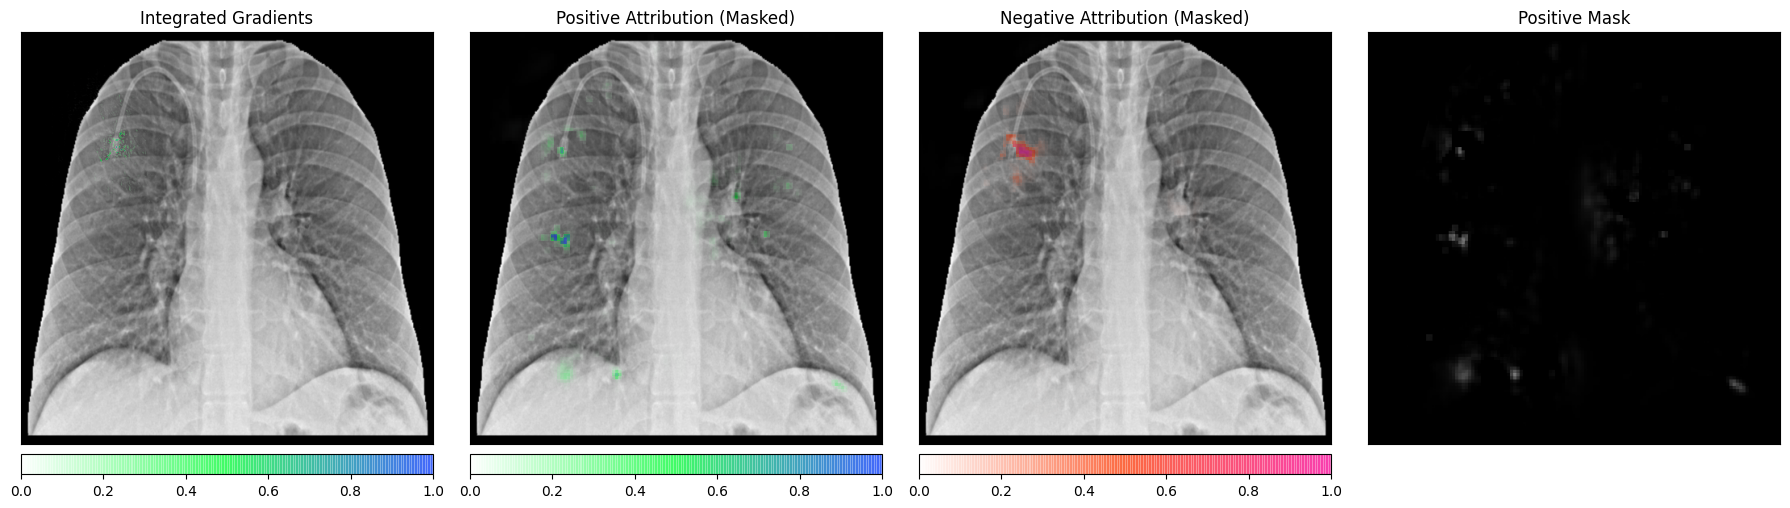

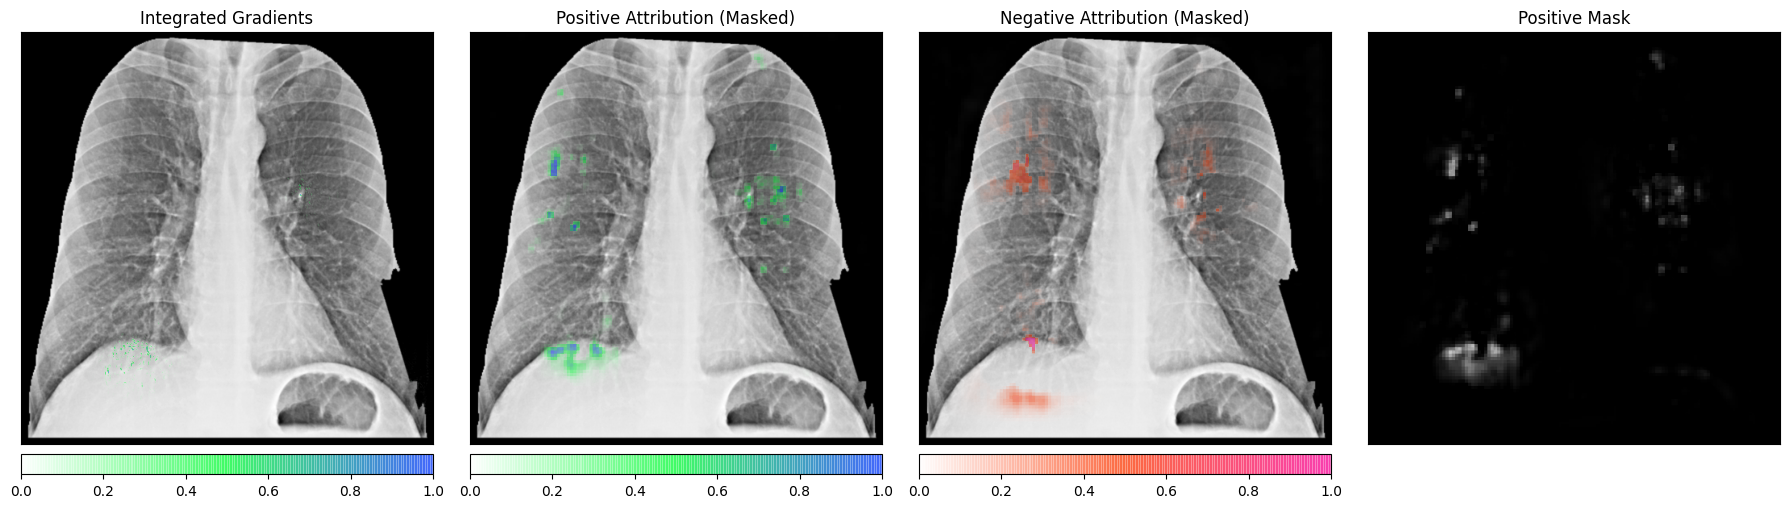

In [ ]:
window = 8
full_base_model_2 = full_base_model_2.to(device)
for i in range(len(paths)):
    curr_label = 1 if "1" in paths[i].split("/")[-2] else 0
    if curr_label == 1:
        curr_bbox = helpers.bboxes.resize_bboxes([bbox_df[paths[i].split("/")[-1].split("_")[0]]],224,512)[0]
        init_and_viz_intgrad_occlusion(full_base_model_2, inputs[i], curr_label ,curr_bbox, window=window)
    else:
        init_and_viz_intgrad_occlusion(full_base_model_2, inputs[i], curr_label, window=window)
full_base_model_2 = full_base_model_2.to("cpu")

#### Model 3

##### Nodule

In [ ]:
window=8
full_base_model_3 = full_base_model_3.to(device)
for i in range(len(pos_paths)):
    pos_curr_label = 1 if "1" in pos_paths[i].split("/")[-2] else 0
    if pos_curr_label == 1:
        pos_curr_bbox = helpers.bboxes.resize_bboxes([bbox_df[pos_paths[i].split("/")[-1].split("_")[0]]],224,512)[0]
        init_and_viz_intgrad_occlusion(full_base_model_3, pos_inputs[i], pos_curr_label ,pos_curr_bbox,window=window)
    else:
        init_and_viz_intgrad_occlusion(full_base_model_3, pos_inputs[i], pos_curr_label, window=window)
full_base_model_3 = full_base_model_3.to("cpu")

##### Normal

In [ ]:
window=8
full_base_model_3 = full_base_model_3.to(device)
for i in range(len(paths)):
    curr_label = 1 if "1" in paths[i].split("/")[-2] else 0
    if curr_label == 1:
        curr_bbox = helpers.bboxes.resize_bboxes([bbox_df[paths[i].split("/")[-1].split("_")[0]]],224,512)[0]
        init_and_viz_intgrad_occlusion(full_base_model_3, inputs[i], curr_label ,curr_bbox,window=window)
    else:
        init_and_viz_intgrad_occlusion(full_base_model_3, inputs[i], curr_label,window=window)
full_base_model_3 = full_base_model_3.to("cpu")

### Grey Test

#### Model 1

##### Nodule

In [ ]:
window=8
curr_model = full_grey_model_1
curr_model = curr_model.to(device)
for i in range(len(pos_paths)):
    pos_curr_label = 1 if "1" in pos_paths[i].split("/")[-2] else 0
    if pos_curr_label == 1:
        pos_curr_bbox = helpers.bboxes.resize_bboxes([bbox_df[pos_paths[i].split("/")[-1].split("_")[0]]],224,512)[0]
        init_and_viz_intgrad_occlusion(curr_model, pos_inputs[i], pos_curr_label ,pos_curr_bbox, single=False, window=window)
    else:
        init_and_viz_intgrad_occlusion(curr_model, pos_inputs[i], pos_curr_label, single=False, window=window)
curr_model = curr_model.to("cpu")

##### Normal

In [ ]:
window=8
curr_model = full_grey_model_1
curr_model = curr_model.to(device)
for i in range(len(paths)):
    curr_label = 1 if "1" in paths[i].split("/")[-2] else 0
    if curr_label == 1:
        curr_bbox = helpers.bboxes.resize_bboxes([bbox_df[paths[i].split("/")[-1].split("_")[0]]],224,512)[0]
        init_and_viz_intgrad_occlusion(curr_model, inputs[i], curr_label ,curr_bbox, single=False,window=window)
    else:
        init_and_viz_intgrad_occlusion(curr_model, inputs[i], curr_label, single=False, window=window)
curr_model = curr_model.to("cpu")

#### Model 2

##### Nodule

In [ ]:
window=8
curr_model = full_grey_model_2
curr_model = curr_model.to(device)
for i in range(len(pos_paths)):
    pos_curr_label = 1 if "1" in pos_paths[i].split("/")[-2] else 0
    if pos_curr_label == 1:
        pos_curr_bbox = helpers.bboxes.resize_bboxes([bbox_df[pos_paths[i].split("/")[-1].split("_")[0]]],224,512)[0]
        init_and_viz_intgrad_occlusion(curr_model, pos_inputs[i], pos_curr_label ,pos_curr_bbox, single=False, window=window)
    else:
        init_and_viz_intgrad_occlusion(curr_model, pos_inputs[i], pos_curr_label, single=False,window=window)
curr_model = curr_model.to("cpu")

##### Normal

In [ ]:
window=8
curr_model = full_grey_model_2
curr_model = curr_model.to(device)
for i in range(len(paths)):
    curr_label = 1 if "1" in paths[i].split("/")[-2] else 0
    if curr_label == 1:
        curr_bbox = helpers.bboxes.resize_bboxes([bbox_df[paths[i].split("/")[-1].split("_")[0]]],224,512)[0]
        init_and_viz_intgrad_occlusion(curr_model, inputs[i], curr_label ,curr_bbox, single=False,window=window)
    else:
        init_and_viz_intgrad_occlusion(curr_model, inputs[i], curr_label, single=False,window=window)
curr_model = curr_model.to("cpu")

#### Model 3

##### Nodule

In [ ]:
window=8
curr_model = full_grey_model_3
curr_model = curr_model.to(device)
for i in range(len(pos_paths)):
    pos_curr_label = 1 if "1" in pos_paths[i].split("/")[-2] else 0
    if pos_curr_label == 1:
        pos_curr_bbox = helpers.bboxes.resize_bboxes([bbox_df[pos_paths[i].split("/")[-1].split("_")[0]]],224,512)[0]
        init_and_viz_intgrad_occlusion(curr_model, pos_inputs[i], pos_curr_label ,pos_curr_bbox, single=False, window=window)
    else:
        init_and_viz_intgrad_occlusion(curr_model, pos_inputs[i], pos_curr_label, single=False,window=window)
curr_model = curr_model.to("cpu")

##### Normal

In [ ]:
window=8
curr_model = full_grey_model_3
curr_model = curr_model.to(device)
for i in range(len(paths)):
    curr_label = 1 if "1" in paths[i].split("/")[-2] else 0
    if curr_label == 1:
        curr_bbox = helpers.bboxes.resize_bboxes([bbox_df[paths[i].split("/")[-1].split("_")[0]]],224,512)[0]
        init_and_viz_intgrad_occlusion(curr_model, inputs[i], curr_label ,curr_bbox, single=False,window=window)
    else:
        init_and_viz_intgrad_occlusion(curr_model, inputs[i], curr_label, single=False, window=window)
curr_model = curr_model.to("cpu")

### Single Test

#### Model 1

##### Nodule

In [ ]:
window=8
curr_model = full_single_model_1
curr_model = curr_model.to(device)
for i in range(len(paths)):
    single_curr_label = 1 if "1" in paths[i].split("/")[-2] else 0
    if single_curr_label == 1:
        single_curr_bbox = helpers.bboxes.resize_bboxes([bbox_df[paths[i].split("/")[-1].split("_")[0]]],224,512)[0]
        init_and_viz_intgrad_occlusion(curr_model, single_inputs[i], single_curr_label ,single_curr_bbox, single=True,window=window)
    else:
        init_and_viz_intgrad_occlusion(curr_model, single_inputs[i], single_curr_label, single=True,window=window)
curr_model = curr_model.to("cpu")

##### Normal

In [ ]:
window=8
curr_model = full_single_model_1
curr_model = curr_model.to(device)
for i in range(len(pos_paths)):
    pos_single_curr_label = 1 if "1" in pos_paths[i].split("/")[-2] else 0
    if pos_single_curr_label == 1:
        pos_single_curr_bbox = helpers.bboxes.resize_bboxes([bbox_df[pos_paths[i].split("/")[-1].split("_")[0]]],224,512)[0]
        init_and_viz_intgrad_occlusion(curr_model, pos_single_inputs[i], pos_single_curr_label ,pos_single_curr_bbox, single=True, window=window)
    else:
        init_and_viz_intgrad_occlusion(curr_model, pos_single_inputs[i], pos_single_curr_label, single=True, window=window)
curr_model = curr_model.to("cpu")

#### Model 2

##### Nodule

In [ ]:
window=8
curr_model = full_single_model_2
curr_model = curr_model.to(device)
for i in range(len(pos_paths)):
    pos_single_curr_label = 1 if "1" in pos_paths[i].split("/")[-2] else 0
    if pos_single_curr_label == 1:
        pos_single_curr_bbox = helpers.bboxes.resize_bboxes([bbox_df[pos_paths[i].split("/")[-1].split("_")[0]]],224,512)[0]
        init_and_viz_intgrad_occlusion(curr_model, pos_single_inputs[i], pos_single_curr_label ,pos_single_curr_bbox, single=True, window=window)
    else:
        init_and_viz_intgrad_occlusion(curr_model, pos_single_inputs[i], pos_single_curr_label, single=True, window=window)
curr_model = curr_model.to("cpu")

##### Normal

In [ ]:
window=8
curr_model = full_single_model_2
curr_model = curr_model.to(device)
for i in range(len(paths)):
    single_curr_label = 1 if "1" in paths[i].split("/")[-2] else 0
    if single_curr_label == 1:
        single_curr_bbox = helpers.bboxes.resize_bboxes([bbox_df[paths[i].split("/")[-1].split("_")[0]]],224,512)[0]
        init_and_viz_intgrad_occlusion(curr_model, single_inputs[i], single_curr_label ,single_curr_bbox, single=True, window=window)
    else:
        init_and_viz_intgrad_occlusion(curr_model, single_inputs[i], single_curr_label, single=True, window=window)
curr_model = curr_model.to("cpu")

#### Model 3

##### Nodule

In [ ]:
window=8
curr_model = full_single_model_3
curr_model = curr_model.to(device)
for i in range(len(pos_paths)):
    pos_single_curr_label = 1 if "1" in pos_paths[i].split("/")[-2] else 0
    if pos_single_curr_label == 1:
        pos_single_curr_bbox = helpers.bboxes.resize_bboxes([bbox_df[pos_paths[i].split("/")[-1].split("_")[0]]],224,512)[0]
        init_and_viz_intgrad_occlusion(curr_model, pos_single_inputs[i], pos_single_curr_label ,pos_single_curr_bbox, single=True, window=window)
    else:
        init_and_viz_intgrad_occlusion(curr_model, pos_single_inputs[i], pos_single_curr_label, single=True,window=window)
curr_model = curr_model.to("cpu")

##### Normal

In [ ]:
window=8
curr_model = full_single_model_3
curr_model = curr_model.to(device)
for i in range(len(paths)):
    single_curr_label = 1 if "1" in paths[i].split("/")[-2] else 0
    if single_curr_label == 1:
        single_curr_bbox = helpers.bboxes.resize_bboxes([bbox_df[paths[i].split("/")[-1].split("_")[0]]],224,512)[0]
        init_and_viz_intgrad_occlusion(curr_model, single_inputs[i], single_curr_label ,single_curr_bbox, single=True,window=window)
    else:
        init_and_viz_intgrad_occlusion(curr_model, single_inputs[i], single_curr_label, single=True,window=window)
curr_model = curr_model.to("cpu")

## First Layer Freeze Networks 

## Half Freeze Networks 

### Base Test

#### Model 1

##### Nodule

In [ ]:
window = 8
first_base_model_1 = first_base_model_1.to(device)
for i in range(len(pos_paths)):
    pos_curr_label = 1 if "1" in pos_paths[i].split("/")[-2] else 0
    if pos_curr_label == 1:
        pos_curr_bbox = helpers.bboxes.resize_bboxes([bbox_df[pos_paths[i].split("/")[-1].split("_")[0]]],224,512)[0]
        init_and_viz_intgrad_occlusion(first_base_model_1, pos_inputs[i], pos_curr_label ,pos_curr_bbox,window=window)
    else:
        init_and_viz_intgrad_occlusion(first_base_model_1, pos_inputs[i], pos_curr_label, window=window)
first_base_model_1 = first_base_model_1.to("cpu")

##### Normal

In [ ]:
window=8
first_base_model_1 = first_base_model_1.to(device)
for i in range(len(paths)):
    curr_label = 1 if "1" in paths[i].split("/")[-2] else 0
    if curr_label == 1:
        curr_bbox = helpers.bboxes.resize_bboxes([bbox_df[paths[i].split("/")[-1].split("_")[0]]],224,512)[0]
        init_and_viz_intgrad_occlusion(first_base_model_1, inputs[i], curr_label ,curr_bbox,window=window)
    else:
        init_and_viz_intgrad_occlusion(first_base_model_1, inputs[i], curr_label,window=window)
first_base_model_1 = first_base_model_1.to("cpu")

#### Model 2

##### Nodule

In [ ]:
window=8
first_base_model_2 = first_base_model_2.to(device)
for i in range(len(pos_paths)):
    pos_curr_label = 1 if "1" in pos_paths[i].split("/")[-2] else 0
    if pos_curr_label == 1:
        pos_curr_bbox = helpers.bboxes.resize_bboxes([bbox_df[pos_paths[i].split("/")[-1].split("_")[0]]],224,512)[0]
        init_and_viz_intgrad_occlusion(first_base_model_2, pos_inputs[i], pos_curr_label ,pos_curr_bbox,window=window)
    else:
        init_and_viz_intgrad_occlusion(first_base_model_2, pos_inputs[i], pos_curr_label,window=window)
first_base_model_2 = first_base_model_2.to("cpu")

##### Normal

In [ ]:
window=8
first_base_model_2 = first_base_model_2.to(device)
for i in range(len(paths)):
    curr_label = 1 if "1" in paths[i].split("/")[-2] else 0
    if curr_label == 1:
        curr_bbox = helpers.bboxes.resize_bboxes([bbox_df[paths[i].split("/")[-1].split("_")[0]]],224,512)[0]
        init_and_viz_intgrad_occlusion(first_base_model_2, inputs[i], curr_label ,curr_bbox,window=window)
    else:
        init_and_viz_intgrad_occlusion(first_base_model_2, inputs[i], curr_label,window=window)
first_base_model_2 = first_base_model_2.to("cpu")

#### Model 3

##### Nodule

In [ ]:
window=8
first_base_model_3 = first_base_model_3.to(device)
for i in range(len(pos_paths)):
    pos_curr_label = 1 if "1" in pos_paths[i].split("/")[-2] else 0
    if pos_curr_label == 1:
        pos_curr_bbox = helpers.bboxes.resize_bboxes([bbox_df[pos_paths[i].split("/")[-1].split("_")[0]]],224,512)[0]
        init_and_viz_intgrad_occlusion(first_base_model_3, pos_inputs[i], pos_curr_label ,pos_curr_bbox,window=window)
    else:
        init_and_viz_intgrad_occlusion(first_base_model_3, pos_inputs[i], pos_curr_label,window=window)
first_base_model_3 = first_base_model_3.to("cpu")

##### Normal

In [ ]:
window=8
first_base_model_3 = first_base_model_3.to(device)
for i in range(len(paths)):
    curr_label = 1 if "1" in paths[i].split("/")[-2] else 0
    if curr_label == 1:
        curr_bbox = helpers.bboxes.resize_bboxes([bbox_df[paths[i].split("/")[-1].split("_")[0]]],224,512)[0]
        init_and_viz_intgrad_occlusion(first_base_model_3, inputs[i], curr_label ,curr_bbox,window=window)
    else:
        init_and_viz_intgrad_occlusion(first_base_model_3, inputs[i], curr_label,window=window)
first_base_model_3 = first_base_model_3.to("cpu")

### Grey Test

#### Model 1

##### Nodule

In [ ]:
window=8
curr_model = first_grey_model_1
curr_model = curr_model.to(device)
for i in range(len(pos_paths)):
    pos_curr_label = 1 if "1" in pos_paths[i].split("/")[-2] else 0
    if curr_label == 1:
        pos_curr_bbox = helpers.bboxes.resize_bboxes([bbox_df[pos_paths[i].split("/")[-1].split("_")[0]]],224,512)[0]
        init_and_viz_intgrad_occlusion(curr_model, pos_inputs[i], pos_curr_label ,pos_curr_bbox, single=False,window=window)
    else:
        init_and_viz_intgrad_occlusion(curr_model, pos_inputs[i], pos_curr_label, single=False,window=window)
curr_model = curr_model.to("cpu")

##### Normal

In [ ]:
window=8
curr_model = first_grey_model_1
curr_model = curr_model.to(device)
for i in range(len(paths)):
    curr_label = 1 if "1" in paths[i].split("/")[-2] else 0
    if curr_label == 1:
        curr_bbox = helpers.bboxes.resize_bboxes([bbox_df[paths[i].split("/")[-1].split("_")[0]]],224,512)[0]
        init_and_viz_intgrad_occlusion(curr_model, inputs[i], curr_label ,curr_bbox,window=window)
    else:
        init_and_viz_intgrad_occlusion(curr_model, inputs[i], curr_label,window=window)
curr_model = curr_model.to("cpu")

#### Model 2

##### Nodule

In [ ]:
window=8
curr_model = first_grey_model_2
curr_model = curr_model.to(device)
for i in range(len(pos_paths)):
    pos_curr_label = 1 if "1" in pos_paths[i].split("/")[-2] else 0
    if pos_curr_label == 1:
        pos_curr_bbox = helpers.bboxes.resize_bboxes([bbox_df[pos_paths[i].split("/")[-1].split("_")[0]]],224,512)[0]
        init_and_viz_intgrad_occlusion(curr_model, pos_inputs[i], pos_curr_label ,pos_curr_bbox, single=False,window=window)
    else:
        init_and_viz_intgrad_occlusion(curr_model, pos_inputs[i], pos_curr_label, single=False,window=window)
curr_model = curr_model.to("cpu")

##### Normal

In [ ]:
window=8
curr_model = first_grey_model_2
curr_model = curr_model.to(device)
for i in range(len(paths)):
    curr_label = 1 if "1" in paths[i].split("/")[-2] else 0
    if curr_label == 1:
        curr_bbox = helpers.bboxes.resize_bboxes([bbox_df[paths[i].split("/")[-1].split("_")[0]]],224,512)[0]
        init_and_viz_intgrad_occlusion(curr_model, inputs[i], curr_label ,curr_bbox,window=window)
    else:
        init_and_viz_intgrad_occlusion(curr_model, inputs[i], curr_label,window=window)
curr_model = curr_model.to("cpu")

#### Model 3

##### Nodule

In [ ]:
window=8
curr_model = first_grey_model_3
curr_model = curr_model.to(device)
for i in range(len(pos_paths)):
    pos_curr_label = 1 if "1" in pos_paths[i].split("/")[-2] else 0
    if pos_curr_label == 1:
        pos_curr_bbox = helpers.bboxes.resize_bboxes([bbox_df[pos_paths[i].split("/")[-1].split("_")[0]]],224,512)[0]
        init_and_viz_intgrad_occlusion(curr_model, pos_inputs[i], pos_curr_label ,pos_curr_bbox, single=False,window=window)
    else:
        init_and_viz_intgrad_occlusion(curr_model, pos_inputs[i], pos_curr_label, single=False,window=window)
curr_model = curr_model.to("cpu")

##### Normal

In [ ]:
window=8
curr_model = first_grey_model_3
curr_model = curr_model.to(device)
for i in range(len(paths)):
    curr_label = 1 if "1" in paths[i].split("/")[-2] else 0
    if curr_label == 1:
        curr_bbox = helpers.bboxes.resize_bboxes([bbox_df[paths[i].split("/")[-1].split("_")[0]]],224,512)[0]
        init_and_viz_intgrad_occlusion(curr_model, inputs[i], curr_label ,curr_bbox,window=window)
    else:
        init_and_viz_intgrad_occlusion(curr_model, inputs[i], curr_label,window=window)
curr_model = curr_model.to("cpu")

### Single Test

#### Model 1

##### Nodule

In [ ]:
window=8
curr_model = first_single_model_1
curr_model = curr_model.to(device)
for i in range(len(pos_paths)):
    pos_single_curr_label = 1 if "1" in pos_paths[i].split("/")[-2] else 0
    if pos_single_curr_label == 1:
        pos_single_curr_bbox = helpers.bboxes.resize_bboxes([bbox_df[pos_paths[i].split("/")[-1].split("_")[0]]],224,512)[0]
        init_and_viz_intgrad_occlusion(curr_model, pos_single_inputs[i], pos_single_curr_label ,pos_single_curr_bbox, single=True,window=window)
    else:
        init_and_viz_intgrad_occlusion(curr_model, pos_single_inputs[i], pos_single_curr_label, single=True,window=window)
curr_model = curr_model.to("cpu")

##### Normal

In [ ]:
window=8
curr_model = first_single_model_1
curr_model = curr_model.to(device)
for i in range(len(paths)):
    single_curr_label = 1 if "1" in paths[i].split("/")[-2] else 0
    if single_curr_label == 1:
        single_curr_bbox = helpers.bboxes.resize_bboxes([bbox_df[paths[i].split("/")[-1].split("_")[0]]],224,512)[0]
        init_and_viz_intgrad_occlusion(curr_model, single_inputs[i], single_curr_label ,single_curr_bbox, single=True,window=window)
    else:
        init_and_viz_intgrad_occlusion(curr_model, single_inputs[i], single_curr_label, single=True,window=window)
curr_model = curr_model.to("cpu")

#### Model 2

##### Nodule

In [ ]:
window=8
curr_model = first_single_model_2
curr_model = curr_model.to(device)
for i in range(len(pos_paths)):
    pos_single_curr_label = 1 if "1" in pos_paths[i].split("/")[-2] else 0
    if pos_single_curr_label == 1:
        pos_single_curr_bbox = helpers.bboxes.resize_bboxes([bbox_df[pos_paths[i].split("/")[-1].split("_")[0]]],224,512)[0]
        init_and_viz_intgrad_occlusion(curr_model, pos_single_inputs[i], pos_single_curr_label ,pos_single_curr_bbox, single=True,window=window)
    else:
        init_and_viz_intgrad_occlusion(curr_model, pos_single_inputs[i], pos_single_curr_label, single=True,window=window)
curr_model = curr_model.to("cpu")

##### Normal

In [ ]:
window=8
curr_model = first_single_model_2
curr_model = curr_model.to(device)
for i in range(len(paths)):
    single_curr_label = 1 if "1" in paths[i].split("/")[-2] else 0
    if single_curr_label == 1:
        single_curr_bbox = helpers.bboxes.resize_bboxes([bbox_df[paths[i].split("/")[-1].split("_")[0]]],224,512)[0]
        init_and_viz_intgrad_occlusion(curr_model, single_inputs[i], single_curr_label ,single_curr_bbox, single=True,window=window)
    else:
        init_and_viz_intgrad_occlusion(curr_model, single_inputs[i], single_curr_label, single=True,window=window)
curr_model = curr_model.to("cpu")

#### Model 3

##### Nodule

In [ ]:
window=8
curr_model = first_single_model_3
curr_model = curr_model.to(device)
for i in range(len(pos_paths)):
    pos_single_curr_label = 1 if "1" in pos_paths[i].split("/")[-2] else 0
    if pos_single_curr_label == 1:
        pos_single_curr_bbox = helpers.bboxes.resize_bboxes([bbox_df[pos_paths[i].split("/")[-1].split("_")[0]]],224,512)[0]
        init_and_viz_intgrad_occlusion(curr_model, pos_single_inputs[i], pos_single_curr_label ,pos_single_curr_bbox, single=True,window=window)
    else:
        init_and_viz_intgrad_occlusion(curr_model, pos_single_inputs[i], pos_single_curr_label, single=True,window=window)
curr_model = curr_model.to("cpu")

##### Normal

In [ ]:
window=8
curr_model = first_single_model_3
curr_model = curr_model.to(device)
for i in range(len(paths)):
    single_curr_label = 1 if "1" in paths[i].split("/")[-2] else 0
    if single_curr_label == 1:
        single_curr_bbox = helpers.bboxes.resize_bboxes([bbox_df[paths[i].split("/")[-1].split("_")[0]]],224,512)[0]
        init_and_viz_intgrad_occlusion(curr_model, single_inputs[i], single_curr_label ,single_curr_bbox, single=True,window=window)
    else:
        init_and_viz_intgrad_occlusion(curr_model, single_inputs[i], single_curr_label, single=True,window=window)
curr_model = curr_model.to("cpu")

#### Base Test

##### Model 1

In [ ]:
half_base_model_1 = half_base_model_1.to(device) 
for i in range(len(pos_paths)):
    pos_curr_label = 1 if "1" in pos_paths[i].split("/")[-2] else 0
    if pos_curr_label == 1:
        pos_curr_bbox = helpers.bboxes.resize_bboxes([bbox_df[pos_paths[i].split("/")[-1].split("_")[0]]],224,512)[0]
        init_and_viz_intgrad_occlusion(half_base_model_1, pos_inputs[i], pos_curr_label ,pos_curr_bbox)
    else:
        init_and_viz_intgrad_occlusion(half_base_model_1, pos_inputs[i], pos_curr_label)
half_base_model_1 = half_base_model_1.to("cpu")

In [ ]:
half_base_model_1 = half_base_model_1.to(device)
for i in range(len(paths)):
    curr_label = 1 if "1" in paths[i].split("/")[-2] else 0
    if curr_label == 1:
        curr_bbox = helpers.bboxes.resize_bboxes([bbox_df[paths[i].split("/")[-1].split("_")[0]]],224,512)[0]
        init_and_viz_intgrad_occlusion(half_base_model_1, inputs[i], curr_label ,curr_bbox)
    else:
        init_and_viz_intgrad_occlusion(half_base_model_1, inputs[i], curr_label)
half_base_model_1 = half_base_model_1.to("cpu")

##### Model 2

In [ ]:
half_base_model_2 = half_base_model_2.to(device)
for i in range(len(pos_paths)):
    pos_curr_label = 1 if "1" in pos_paths[i].split("/")[-2] else 0
    if pos_curr_label == 1:
        pos_curr_bbox = helpers.bboxes.resize_bboxes([bbox_df[pos_paths[i].split("/")[-1].split("_")[0]]],224,512)[0]
        init_and_viz_intgrad_occlusion(half_base_model_2, pos_inputs[i], pos_curr_label ,pos_curr_bbox)
    else:
        init_and_viz_intgrad_occlusion(half_base_model_2, pos_inputs[i], pos_curr_label)
half_base_model_2 = first_base_model_2.to("cpu")

In [ ]:
half_base_model_2 = half_base_model_2.to(device)
for i in range(len(paths)):
    curr_label = 1 if "1" in paths[i].split("/")[-2] else 0
    if curr_label == 1:
        curr_bbox = helpers.bboxes.resize_bboxes([bbox_df[paths[i].split("/")[-1].split("_")[0]]],224,512)[0]
        init_and_viz_intgrad_occlusion(half_base_model_2, inputs[i], curr_label ,curr_bbox)
    else:
        init_and_viz_intgrad_occlusion(half_base_model_2, inputs[i], curr_label)
half_base_model_2 = half_base_model_2.to("cpu")

##### Model 3

In [ ]:
half_base_model_3 = half_base_model_3.to(device)
for i in range(len(pos_paths)):
    pos_curr_label = 1 if "1" in pos_paths[i].split("/")[-2] else 0
    if pos_curr_label == 1:
        pos_curr_bbox = helpers.bboxes.resize_bboxes([bbox_df[pos_paths[i].split("/")[-1].split("_")[0]]],224,512)[0]
        init_and_viz_intgrad_occlusion(half_base_model_3, pos_inputs[i], pos_curr_label ,pos_curr_bbox)
    else:
        init_and_viz_intgrad_occlusion(half_base_model_3, pos_inputs[i], pos_curr_label)
half_base_model_3 = half_base_model_3.to("cpu")

In [ ]:
half_base_model_3 = half_base_model_3.to(device)
for i in range(len(paths)):
    curr_label = 1 if "1" in paths[i].split("/")[-2] else 0
    if curr_label == 1:
        curr_bbox = helpers.bboxes.resize_bboxes([bbox_df[paths[i].split("/")[-1].split("_")[0]]],224,512)[0]
        init_and_viz_intgrad_occlusion(half_base_model_3, inputs[i], curr_label ,curr_bbox)
    else:
        init_and_viz_intgrad_occlusion(half_base_model_3, inputs[i], curr_label)
half_base_model_3 = half_base_model_3.to("cpu")

#### Grey Test

##### Model 1

In [ ]:
curr_model = half_grey_model_1
curr_model = curr_model.to(device)
for i in range(len(pos_paths)):
    pos_curr_label = 1 if "1" in pos_paths[i].split("/")[-2] else 0
    if pos_curr_label == 1:
        pos_curr_bbox = helpers.bboxes.resize_bboxes([bbox_df[pos_paths[i].split("/")[-1].split("_")[0]]],224,512)[0]
        init_and_viz_intgrad_occlusion(curr_model, pos_inputs[i], pos_curr_label ,pos_curr_bbox, single=False)
    else:
        init_and_viz_intgrad_occlusion(curr_model, pos_inputs[i], pos_curr_label, single=False)
curr_model = curr_model.to("cpu")

In [ ]:
curr_model = half_grey_model_1
curr_model = curr_model.to(device)
for i in range(len(pos_paths)):
    pos_curr_label = 1 if "1" in pos_paths[i].split("/")[-2] else 0
    if curr_label == 1:
        pos_curr_bbox = helpers.bboxes.resize_bboxes([bbox_df[pos_paths[i].split("/")[-1].split("_")[0]]],224,512)[0]
        init_and_viz_intgrad_occlusion(curr_model, pos_inputs[i], pos_curr_label ,pos_curr_bbox, single=False)
    else:
        init_and_viz_intgrad_occlusion(curr_model, pos_inputs[i], pos_curr_label, single=False)
curr_model = curr_model.to("cpu")

In [ ]:
curr_model = half_grey_model_1
curr_model = curr_model.to(device)
for i in range(len(paths)):
    curr_label = 1 if "1" in paths[i].split("/")[-2] else 0
    if curr_label == 1:
        curr_bbox = helpers.bboxes.resize_bboxes([bbox_df[paths[i].split("/")[-1].split("_")[0]]],224,512)[0]
        init_and_viz_intgrad_occlusion(curr_model, inputs[i], curr_label ,curr_bbox)
    else:
        init_and_viz_intgrad_occlusion(curr_model, inputs[i], curr_label)
curr_model = curr_model.to("cpu")

##### Model 2

In [ ]:
curr_model = half_grey_model_2
curr_model = curr_model.to(device)
for i in range(len(pos_paths)):
    pos_curr_label = 1 if "1" in pos_paths[i].split("/")[-2] else 0
    if pos_curr_label == 1:
        pos_curr_bbox = helpers.bboxes.resize_bboxes([bbox_df[pos_paths[i].split("/")[-1].split("_")[0]]],224,512)[0]
        init_and_viz_intgrad_occlusion(curr_model, pos_inputs[i], pos_curr_label ,pos_curr_bbox, single=False)
    else:
        init_and_viz_intgrad_occlusion(curr_model, pos_inputs[i], pos_curr_label, single=False)
curr_model = curr_model.to("cpu")

In [ ]:
curr_model = half_grey_model_2
curr_model = curr_model.to(device)
for i in range(len(paths)):
    curr_label = 1 if "1" in paths[i].split("/")[-2] else 0
    if curr_label == 1:
        curr_bbox = helpers.bboxes.resize_bboxes([bbox_df[paths[i].split("/")[-1].split("_")[0]]],224,512)[0]
        init_and_viz_intgrad_occlusion(curr_model, inputs[i], curr_label ,curr_bbox)
    else:
        init_and_viz_intgrad_occlusion(curr_model, inputs[i], curr_label)
curr_model = curr_model.to("cpu")

##### Model 3

In [ ]:
curr_model = half_grey_model_3
curr_model = curr_model.to(device)
for i in range(len(pos_paths)):
    pos_curr_label = 1 if "1" in pos_paths[i].split("/")[-2] else 0
    if pos_curr_label == 1:
        pos_curr_bbox = helpers.bboxes.resize_bboxes([bbox_df[pos_paths[i].split("/")[-1].split("_")[0]]],224,512)[0]
        init_and_viz_intgrad_occlusion(curr_model, pos_inputs[i], pos_curr_label ,pos_curr_bbox, single=False)
    else:
        init_and_viz_intgrad_occlusion(curr_model, pos_inputs[i], pos_curr_label, single=False)
curr_model = curr_model.to("cpu")

In [ ]:
curr_model = half_grey_model_3
curr_model = curr_model.to(device)
for i in range(len(paths)):
    curr_label = 1 if "1" in paths[i].split("/")[-2] else 0
    if curr_label == 1:
        curr_bbox = helpers.bboxes.resize_bboxes([bbox_df[paths[i].split("/")[-1].split("_")[0]]],224,512)[0]
        init_and_viz_intgrad_occlusion(curr_model, inputs[i], curr_label ,curr_bbox)
    else:
        init_and_viz_intgrad_occlusion(curr_model, inputs[i], curr_label)
curr_model = curr_model.to("cpu")

#### Single Test

##### Model 1

In [ ]:
curr_model = half_single_model_1
curr_model = curr_model.to(device)
for i in range(len(pos_paths)):
    pos_single_curr_label = 1 if "1" in pos_paths[i].split("/")[-2] else 0
    if pos_single_curr_label == 1:
        pos_single_curr_bbox = helpers.bboxes.resize_bboxes([bbox_df[pos_paths[i].split("/")[-1].split("_")[0]]],224,512)[0]
        init_and_viz_intgrad_occlusion(curr_model, pos_single_inputs[i], pos_single_curr_label ,pos_single_curr_bbox, single=True)
    else:
        init_and_viz_intgrad_occlusion(curr_model, pos_single_inputs[i], pos_single_curr_label, single=True)
curr_model = curr_model.to("cpu")

In [ ]:
curr_model = half_single_model_1
curr_model = curr_model.to(device)
for i in range(len(paths)):
    single_curr_label = 1 if "1" in paths[i].split("/")[-2] else 0
    if single_curr_label == 1:
        single_curr_bbox = helpers.bboxes.resize_bboxes([bbox_df[paths[i].split("/")[-1].split("_")[0]]],224,512)[0]
        init_and_viz_intgrad_occlusion(curr_model, single_inputs[i], single_curr_label ,single_curr_bbox, single=True)
    else:
        init_and_viz_intgrad_occlusion(curr_model, single_inputs[i], single_curr_label, single=True)
curr_model = curr_model.to("cpu")

##### Model 2

In [ ]:
curr_model = half_single_model_2
curr_model = curr_model.to(device)
for i in range(len(pos_paths)):
    pos_single_curr_label = 1 if "1" in pos_paths[i].split("/")[-2] else 0
    if pos_single_curr_label == 1:
        pos_single_curr_bbox = helpers.bboxes.resize_bboxes([bbox_df[pos_paths[i].split("/")[-1].split("_")[0]]],224,512)[0]
        init_and_viz_intgrad_occlusion(curr_model, pos_single_inputs[i], pos_single_curr_label ,pos_single_curr_bbox, single=True)
    else:
        init_and_viz_intgrad_occlusion(curr_model, pos_single_inputs[i], pos_single_curr_label, single=True)
curr_model = curr_model.to("cpu")

In [ ]:
curr_model = half_single_model_2
curr_model = curr_model.to(device)
for i in range(len(paths)):
    single_curr_label = 1 if "1" in paths[i].split("/")[-2] else 0
    if single_curr_label == 1:
        single_curr_bbox = helpers.bboxes.resize_bboxes([bbox_df[paths[i].split("/")[-1].split("_")[0]]],224,512)[0]
        init_and_viz_intgrad_occlusion(curr_model, single_inputs[i], single_curr_label ,single_curr_bbox, single=True)
    else:
        init_and_viz_intgrad_occlusion(curr_model, single_inputs[i], single_curr_label, single=True)
curr_model = curr_model.to("cpu")

##### Model 3

In [ ]:
curr_model = half_single_model_3
curr_model = curr_model.to(device)
for i in range(len(pos_paths)):
    pos_single_curr_label = 1 if "1" in pos_paths[i].split("/")[-2] else 0
    if pos_single_curr_label == 1:
        pos_single_curr_bbox = helpers.bboxes.resize_bboxes([bbox_df[pos_paths[i].split("/")[-1].split("_")[0]]],224,512)[0]
        init_and_viz_intgrad_occlusion(curr_model, pos_single_inputs[i], pos_single_curr_label ,pos_single_curr_bbox, single=True)
    else:
        init_and_viz_intgrad_occlusion(curr_model, pos_single_inputs[i], pos_single_curr_label, single=True)
curr_model = curr_model.to("cpu")

In [ ]:
curr_model = half_single_model_3
curr_model = curr_model.to(device)
for i in range(len(paths)):
    single_curr_label = 1 if "1" in paths[i].split("/")[-2] else 0
    if single_curr_label == 1:
        single_curr_bbox = helpers.bboxes.resize_bboxes([bbox_df[paths[i].split("/")[-1].split("_")[0]]],224,512)[0]
        init_and_viz_intgrad_occlusion(curr_model, single_inputs[i], single_curr_label ,single_curr_bbox, single=True)
    else:
        init_and_viz_intgrad_occlusion(curr_model, single_inputs[i], single_curr_label, single=True)
curr_model = curr_model.to("cpu")

## Looping Test

In [ ]:
curr_model = full_base_model_1
curr_model = curr_model.to(device)

for x in range(20):
    # grab a batch
    inputs, labels, paths = next(iter(cxr_test))
    inputs = inputs.to(device)
    labels = labels.to(device)
    for i in range(len(paths)):
        curr_label = 1 if "1" in paths[i].split("/")[-2] else 0
        if curr_label == 1:
            curr_bbox = helpers.bboxes.resize_bboxes([bbox_df[paths[i].split("/")[-1].split("_")[0]]],224,512)[0]
            init_and_viz_intgrad_occlusion(full_base_model_1, inputs[i], curr_label ,curr_bbox)
        else:
            init_and_viz_intgrad_occlusion(full_base_model_1, inputs[i], curr_label)
curr_model = curr_model.to("cpu")

## Integrated Gradient 3x3 Grid 
This plot will visualise all three seeds of all three configurations 

In [ ]:
import gc
import matplotlib.pyplot as plt
def init_and_viz_3x3_intgrad(base_models, grey_models, single_models, \
                             input_img, single_input_img, idx_label, bbox=None,
                             device='cpu',sign = "all"
                            ):
    
    plt_fig = plt.figure(figsize=(18,18))
    plt_axis_np = plt_fig.subplots(3, 3, squeeze=True)
    
    
    # plot base
    i=0
    single=False
    for model in base_models:
        model = model.to(device)
        int_model = helpers.explainability.make_int_grad_model(model)
        int_attr = helpers.explainability.get_occ_int_grad_for_single_tensor(
            int_model,
            input_img,
            idx_label,
            single=single
        )
        model = model.to('cpu')
        # clean up memory
        del int_model
        gc.collect()

        # plot
        if bbox:
            helpers.explainability.viz_intgrad_with_bbox(
                img_attr=int_attr,
                input_img_tensor=input_img,
                bbox=bbox,
                title=f"Base Model {i}",
                method="blended_heat_map",
                sign=sign,
                plt_fig_axis=(plt_fig, plt_axis_np[0][i])
            )
        else:
            helpers.explainability.viz_intgrad(
                img_attr=int_attr,
                input_img_tensor= input_img,
                title=f"Base Model {i}",
                method="blended_heat_map",
                sign=sign,
                plt_fig_axis=(plt_fig, plt_axis_np[0][i])
            )
        i+=1

    # plot grey
    i=0
    single=False
    for model in grey_models:
        model = model.to(device)
        int_model = helpers.explainability.make_int_grad_model(model)
        int_attr = helpers.explainability.get_occ_int_grad_for_single_tensor(
            int_model,
            input_img,
            idx_label,
            single=single
        )
        model = model.to('cpu')
        # clean up memory
        del int_model
        gc.collect()

        # plot
        if bbox:
            helpers.explainability.viz_intgrad_with_bbox(
                img_attr=int_attr,
                input_img_tensor=input_img,
                bbox=bbox,
                title=f"Grey Model {i}",
                method="blended_heat_map",
                sign=sign,
                plt_fig_axis=(plt_fig, plt_axis_np[1][i])
            )
        else:
            helpers.explainability.viz_intgrad(
                img_attr=int_attr,
                input_img_tensor= input_img,
                title=f"Grey Model {i}",
                method="blended_heat_map",
                sign=sign,
                plt_fig_axis=(plt_fig, plt_axis_np[1][i])
            )
        i+=1

    # plot single
    i=0
    single=True
    for model in single_models:
        model = model.to(device)
        int_model = helpers.explainability.make_int_grad_model(model)
        int_attr = helpers.explainability.get_occ_int_grad_for_single_tensor(
            int_model,
            single_input_img,
            idx_label,
            single=single
        )
        model = model.to('cpu')
        # clean up memory
        del int_model
        gc.collect()

        # expand single channel plot
        int_attr = int_attr.expand(3, *int_attr.shape[1:])
        s_input_img = single_input_img.expand(3, *single_input_img.shape[1:])
        # plot
        if bbox:
            helpers.explainability.viz_intgrad_with_bbox(
                img_attr=int_attr,
                input_img_tensor=s_input_img,
                bbox=bbox,
                title=f"Single Model {i}",
                method="blended_heat_map",
                sign=sign,
                plt_fig_axis=(plt_fig, plt_axis_np[2][i])
            )
        else:
            helpers.explainability.viz_intgrad(
                img_attr=int_attr,
                input_img_tensor= s_input_img,
                title=f"Single Model {i}",
                method="blended_heat_map",
                sign=sign,
                plt_fig_axis=(plt_fig, plt_axis_np[2][i]),
            )
        i+=1
    plt_fig.tight_layout()
    plt.show()
    plt.close(plt_fig)

    
    
    # helpers.explainability.plot_ig_and_mask(
    #     attrs = [int_attrs, occ_attrs, occ_attrs, occ_attrs],
    #     img_tensor = input_img,
    #     bbox = bbox if bbox else None,
    #     single=single
    # )

In [ ]:
for i in range(len(pos_paths)):
    pos_curr_label = 1 if "1" in pos_paths[i].split("/")[-2] else 0
    if pos_curr_label == 1:
        pos_curr_bbox = helpers.bboxes.resize_bboxes([bbox_df[pos_paths[i].split("/")[-1].split("_")[0]]],224,512)[0]
        init_and_viz_3x3_intgrad(
            base_models=[full_base_model_1,full_base_model_2,full_base_model_3],
            grey_models=[full_grey_model_1,full_grey_model_2,full_grey_model_3], 
            single_models=[full_single_model_1,full_single_model_2,full_single_model_3], 
            input_img=pos_inputs[i], 
            single_input_img=pos_single_inputs[i], 
            idx_label=pos_curr_label, 
            bbox=pos_curr_bbox,
            device=device,
            sign="positive"
        )
        
    else:
        init_and_viz_3x3_intgrad(
            base_models=[full_base_model_1,full_base_model_2,full_base_model_3],
            grey_models=[full_grey_model_1,full_grey_model_2,full_grey_model_3], 
            single_models=[full_single_model_1,full_single_model_2,full_single_model_3], 
            input_img=pos_inputs[i], 
            single_input_img=pos_single_inputs[i], 
            idx_label=pos_curr_label,
            device=device,
            sign="positive"
        )
    break


In [ ]:
for i in range(len(pos_paths)):
    pos_curr_label = 1 if "1" in pos_paths[i].split("/")[-2] else 0
    if pos_curr_label == 1:
        pos_curr_bbox = helpers.bboxes.resize_bboxes([bbox_df[pos_paths[i].split("/")[-1].split("_")[0]]],224,512)[0]
        init_and_viz_3x3_intgrad(
            base_models=[full_base_model_1,full_base_model_2,full_base_model_3],
            grey_models=[full_grey_model_1,full_grey_model_2,full_grey_model_3], 
            single_models=[full_single_model_1,full_single_model_2,full_single_model_3], 
            input_img=pos_inputs[i], 
            single_input_img=pos_single_inputs[i], 
            idx_label=pos_curr_label, 
            bbox=pos_curr_bbox,
            device=device,
            sign="positive"
        )
        
    else:
        init_and_viz_3x3_intgrad(
            base_models=[full_base_model_1,full_base_model_2,full_base_model_3],
            grey_models=[full_grey_model_1,full_grey_model_2,full_grey_model_3], 
            single_models=[full_single_model_1,full_single_model_2,full_single_model_3], 
            input_img=pos_inputs[i], 
            single_input_img=pos_single_inputs[i], 
            idx_label=pos_curr_label,
            device=device,
            sign="positive"
        )


In [ ]:
for i in range(len(pos_paths)):
    pos_curr_label = 1 if "1" in pos_paths[i].split("/")[-2] else 0
    if pos_curr_label == 1:
        pos_curr_bbox = helpers.bboxes.resize_bboxes([bbox_df[pos_paths[i].split("/")[-1].split("_")[0]]],224,512)[0]
        init_and_viz_3x3_intgrad(
            base_models=[full_base_model_1,full_base_model_2,full_base_model_3],
            grey_models=[full_grey_model_1,full_grey_model_2,full_grey_model_3], 
            single_models=[full_single_model_1,full_single_model_2,full_single_model_3], 
            input_img=pos_inputs[i], 
            single_input_img=pos_single_inputs[i], 
            idx_label=pos_curr_label, 
            bbox=pos_curr_bbox,
            device=device,
            sign="positive"
        )
        
    else:
        init_and_viz_3x3_intgrad(
            base_models=[full_base_model_1,full_base_model_2,full_base_model_3],
            grey_models=[full_grey_model_1,full_grey_model_2,full_grey_model_3], 
            single_models=[full_single_model_1,full_single_model_2,full_single_model_3], 
            input_img=pos_inputs[i], 
            single_input_img=pos_single_inputs[i], 
            idx_label=pos_curr_label,
            device=device,
            sign="positive"
        )


In [ ]:
for i in range(len(pos_paths)):
    pos_curr_label = 1 if "1" in pos_paths[i].split("/")[-2] else 0
    if pos_curr_label == 1:
        pos_curr_bbox = helpers.bboxes.resize_bboxes([bbox_df[pos_paths[i].split("/")[-1].split("_")[0]]],224,512)[0]
        init_and_viz_3x3_intgrad(
            base_models=[full_base_model_1,full_base_model_2,full_base_model_3],
            grey_models=[full_grey_model_1,full_grey_model_2,full_grey_model_3], 
            single_models=[full_single_model_1,full_single_model_2,full_single_model_3], 
            input_img=pos_inputs[i], 
            single_input_img=pos_single_inputs[i], 
            idx_label=pos_curr_label, 
            bbox=pos_curr_bbox,
            device=device
        )
        
    else:
        init_and_viz_3x3_intgrad(
            base_models=[full_base_model_1,full_base_model_2,full_base_model_3],
            grey_models=[full_grey_model_1,full_grey_model_2,full_grey_model_3], 
            single_models=[full_single_model_1,full_single_model_2,full_single_model_3], 
            input_img=pos_inputs[i], 
            single_input_img=pos_single_inputs[i], 
            idx_label=pos_curr_label,
            device=device
        )
    break
        # init_and_viz_intgrad_occlusion(curr_model, pos_single_inputs[i], pos_single_curr_label, single=True)

In [ ]:
for i in range(len(pos_paths)):
    pos_curr_label = 1 if "1" in pos_paths[i].split("/")[-2] else 0
    if pos_curr_label == 1:
        pos_curr_bbox = helpers.bboxes.resize_bboxes([bbox_df[pos_paths[i].split("/")[-1].split("_")[0]]],224,512)[0]
        init_and_viz_3x3_intgrad(
            base_models=[full_base_model_1,full_base_model_2,full_base_model_3],
            grey_models=[full_grey_model_1,full_grey_model_2,full_grey_model_3], 
            single_models=[full_single_model_1,full_single_model_2,full_single_model_3], 
            input_img=pos_inputs[i], 
            single_input_img=pos_single_inputs[i], 
            idx_label=pos_curr_label, 
            bbox=pos_curr_bbox,
            device=device
        )
        
    else:
        init_and_viz_3x3_intgrad(
            base_models=[full_base_model_1,full_base_model_2,full_base_model_3],
            grey_models=[full_grey_model_1,full_grey_model_2,full_grey_model_3], 
            single_models=[full_single_model_1,full_single_model_2,full_single_model_3], 
            input_img=pos_inputs[i], 
            single_input_img=pos_single_inputs[i], 
            idx_label=pos_curr_label,
            device=device
        )
    break
        # init_and_viz_intgrad_occlusion(curr_model, pos_single_inputs[i], pos_single_curr_label, single=True)

## Viz Diff Int Grad Baselines

In [ ]:
import torch

In [ ]:
inp_image.mean()

In [ ]:
inp_image = pos_inputs[0]

In [ ]:
inp_image = pos_inputs[0]
baseline_0 = torch.zeros_like(inp_image) 
baseline_mean = torch.full_like(inp_image, inp_image.mean())


In [ ]:
import gc
import matplotlib.pyplot as plt
def compare_baselines(base_model, grey_model, single_model, \
                             input_img, single_input_img, idx_label, bbox=None,
                             device='cpu',sign = "all", baselines = [0, ]
                            ):
    
    plt_fig = plt.figure(figsize=(18,18))
    plt_axis_np = plt_fig.subplots(3, 3, squeeze=True)
    
    
    # plot base
    single=False

    model = base_model.to(device)
    int_model = helpers.explainability.make_int_grad_model(model)
    int_attr = helpers.explainability.get_occ_int_grad_for_single_tensor(
        int_model,
        input_img,
        idx_label,
        single=single
    )
    model = model.to('cpu')
    # clean up memory
    del int_model
    gc.collect()

    # plot
    if bbox:
        helpers.explainability.viz_intgrad_with_bbox(
            img_attr=int_attr,
            input_img_tensor=input_img,
            bbox=bbox,
            title=f"Base Model",
            method="blended_heat_map",
            sign=sign,
            plt_fig_axis=(plt_fig, plt_axis_np[0][i])
        )
    else:
        helpers.explainability.viz_intgrad(
            img_attr=int_attr,
            input_img_tensor= input_img,
            title=f"Base Model {i}",
            method="blended_heat_map",
            sign=sign,
            plt_fig_axis=(plt_fig, plt_axis_np[0][i])
        )
    model = base_model.to(device)
    int_model = helpers.explainability.make_int_grad_model(model)
    int_attr = helpers.explainability.get_occ_int_grad_for_single_tensor(
        int_model,
        input_img,
        idx_label,
        single=single
    )
    model = model.to('cpu')
    # clean up memory
    del int_model
    gc.collect()

    # plot
    if bbox:
        helpers.explainability.viz_intgrad_with_bbox(
            img_attr=int_attr,
            input_img_tensor=input_img,
            bbox=bbox,
            title=f"Base Model",
            method="blended_heat_map",
            sign=sign,
            plt_fig_axis=(plt_fig, plt_axis_np[0][i])
        )
    else:
        helpers.explainability.viz_intgrad(
            img_attr=int_attr,
            input_img_tensor= input_img,
            title=f"Base Model {i}",
            method="blended_heat_map",
            sign=sign,
            plt_fig_axis=(plt_fig, plt_axis_np[0][i])
        )
    i+=1
    
    # plot grey
    i=0
    single=False
    for model in grey_models:
        model = model.to(device)
        int_model = helpers.explainability.make_int_grad_model(model)
        int_attr = helpers.explainability.get_occ_int_grad_for_single_tensor(
            int_model,
            input_img,
            idx_label,
            single=single
        )
        model = model.to('cpu')
        # clean up memory
        del int_model
        gc.collect()

        # plot
        if bbox:
            helpers.explainability.viz_intgrad_with_bbox(
                img_attr=int_attr,
                input_img_tensor=input_img,
                bbox=bbox,
                title=f"Grey Model {i}",
                method="blended_heat_map",
                sign=sign,
                plt_fig_axis=(plt_fig, plt_axis_np[1][i])
            )
        else:
            helpers.explainability.viz_intgrad(
                img_attr=int_attr,
                input_img_tensor= input_img,
                title=f"Grey Model {i}",
                method="blended_heat_map",
                sign=sign,
                plt_fig_axis=(plt_fig, plt_axis_np[1][i])
            )
        i+=1

    # plot single
    i=0
    single=True
    for model in single_models:
        model = model.to(device)
        int_model = helpers.explainability.make_int_grad_model(model)
        int_attr = helpers.explainability.get_occ_int_grad_for_single_tensor(
            int_model,
            single_input_img,
            idx_label,
            single=single
        )
        model = model.to('cpu')
        # clean up memory
        del int_model
        gc.collect()

        # expand single channel plot
        int_attr = int_attr.expand(3, *int_attr.shape[1:])
        s_input_img = single_input_img.expand(3, *single_input_img.shape[1:])
        # plot
        if bbox:
            helpers.explainability.viz_intgrad_with_bbox(
                img_attr=int_attr,
                input_img_tensor=s_input_img,
                bbox=bbox,
                title=f"Single Model {i}",
                method="blended_heat_map",
                sign=sign,
                plt_fig_axis=(plt_fig, plt_axis_np[2][i])
            )
        else:
            helpers.explainability.viz_intgrad(
                img_attr=int_attr,
                input_img_tensor= s_input_img,
                title=f"Single Model {i}",
                method="blended_heat_map",
                sign=sign,
                plt_fig_axis=(plt_fig, plt_axis_np[2][i]),
            )
        i+=1
    plt_fig.tight_layout()
    plt.show()
    plt.close(plt_fig)

    
    
    # helpers.explainability.plot_ig_and_mask(
    #     attrs = [int_attrs, occ_attrs, occ_attrs, occ_attrs],
    #     img_tensor = input_img,
    #     bbox = bbox if bbox else None,
    #     single=single
    # )

# Vizualise Pixel Intensities 

In [ ]:
from torchvision.transforms import v2
from torch import float32 as tfloat32
from torch.utils.data import DataLoader


In [ ]:
manual_train = helpers.dataloading.ImageFolderWithPaths(
    root = os.path.join(data_root, dataset_name, "train"),
    transform=v2.Compose([
        v2.ToImage(),
        v2.Resize(size=512, antialias=True),
        # v2.ToDtype(tfloat32, scale=True),
        # v2.Normalize(mean=[128.2716/255], std= [76.7148/255])
        v2.ToDtype(tfloat32, scale=False),
        v2.Normalize(mean=[128.2716], std= [76.7148])
    ])
)
manual_padchest_test = helpers.dataloading.ImageFolderWithPaths(
    root = os.path.join(data_root, "padchest", "test"),
    transform=v2.Compose([
        v2.ToImage(),
        v2.Resize(size=512, antialias=True),
        v2.ToDtype(tfloat32, scale=False),
        v2.Normalize(mean=[129.5006], std= [72.6308])
    ])
)

manual_openi_test = helpers.dataloading.ImageFolderWithPaths(
    root = os.path.join(data_root, "openi", "test"),
    transform=v2.Compose([
        v2.ToImage(),
        v2.Resize(size=512, antialias=True),
        # v2.ToDtype(tfloat32, scale=True),
        # v2.Normalize(mean=[128.2716/255], std= [76.7148/255])
        v2.ToDtype(tfloat32, scale=False),
        v2.Normalize(mean=[127.7211], std= [69.7704])
    ])
)

manual_jsrt_test = helpers.dataloading.ImageFolderWithPaths(
    root = os.path.join(data_root, "jsrt", "test"),
    transform=v2.Compose([
        v2.ToImage(),
        v2.Resize(size=512, antialias=True),
        # v2.ToDtype(tfloat32, scale=True),
        # v2.Normalize(mean=[128.2716/255], std= [76.7148/255])
        v2.ToDtype(tfloat32, scale=False),
        v2.Normalize(mean=[139.9666], std= [72.4017])
    ])
)



In [ ]:
print(f"CXR14 Train Samples: {len(manual_train.targets)}")
print(f"CXR14 Test Samples: {len(manual_test.targets)}")
print(f"Padchest Test Samples: {len(manual_padchest_test.targets)}")
print(f"OpenI Test Samples: {len(manual_openi_test.targets)}")
print(f"JSRT Test Samples: {len(manual_jsrt_test.targets)}")

In [ ]:
manual_train_dataloader = DataLoader(manual_train, batch_size=1638, shuffle=False)
train_inputs, train_labels, train_paths = next(iter(manual_train_dataloader))
print(f"min: {train_inputs.min()}")
print(f"max: {train_inputs.max()}")
print(f"mean: {train_inputs.mean()}")

In [ ]:
manual_test_dataloader = DataLoader(manual_test, batch_size=360, shuffle=False)
test_inputs, test_labels, train_paths = next(iter(manual_test_dataloader))
print(f"min: {test_inputs.min()}")
print(f"max: {test_inputs.max()}")
print(f"mean: {test_inputs.mean()}")

In [ ]:
manual_padchest_dataloader = DataLoader(manual_padchest_test, batch_size=188, shuffle=False)
pad_inputs, pad_labels, pad_paths = next(iter(manual_padchest_dataloader))
print(f"min: {pad_inputs.min()}")
print(f"max: {pad_inputs.max()}")
print(f"mean: {pad_inputs.mean()}")

In [ ]:
manual_jsrt_dataloader = DataLoader(manual_jsrt_test, batch_size=186, shuffle=False)
jsrt_inputs, jsrt_labels, jsrt_paths = next(iter(manual_jsrt_dataloader))
print(f"min: {jsrt_inputs.min()}")
print(f"max: {jsrt_inputs.max()}")
print(f"mean: {jsrt_inputs.mean()}")

In [ ]:
manual_openi_dataloader = DataLoader(manual_openi_test, batch_size=108, shuffle=False)
openi_inputs, openi_labels, openi_paths = next(iter(manual_openi_dataloader))
print(f"min: {openi_inputs.min()}")
print(f"max: {openi_inputs.max()}")
print(f"mean: {openi_inputs.mean()}")

In [ ]:
# 'cxr14': [[128.2716], [76.7148]],
manual_test = helpers.dataloading.ImageFolderWithPaths(
    root = os.path.join(data_root, dataset_name, "test"),
    transform=v2.Compose([
        v2.ToImage(),
        v2.Resize(size=512, antialias=True),
        v2.ToDtype(tfloat32, scale=False),
        v2.Normalize(mean=[128.2716/255], std= [76.7148/255]),
        v2.ToDtype(torch.uint8, scale=False),
        v2.ToDtype(tfloat32, scale=True),
        v2.Normalize(mean=[0.5], std= [0.5]),
        # v2.ToDtype(tfloat32, scale=False),
        # v2.Normalize(mean=[128.2716], std= [76.7148])
    ])
)
manual_test_dataloader = DataLoader(manual_test, batch_size=4, shuffle=False)
manual_inputs, manual_labels, manual_paths = next(iter(manual_test_dataloader))
manual_inputs = manual_inputs.to(device)
manual_labels = manual_labels.to(device)

In [ ]:
def norm_transpose_scale_input_tensor(curr_img_tensor):
    """Normalises and transposes an input image tensor for viz"""
    return np.asarray((curr_img_tensor.cpu().numpy() -
                    curr_img_tensor.cpu().numpy().min()) /
                   (curr_img_tensor.cpu().numpy().max() -
                    curr_img_tensor.cpu().cpu().numpy()
                    .min())).transpose(1, 2, 0)

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
nb_bins = 256
count_cxr_train = np.zeros(nb_bins)
count_cxr_test = np.zeros(nb_bins)
count_pad = np.zeros(nb_bins)
count_openi = np.zeros(nb_bins)
count_jsrt = np.zeros(nb_bins)

for image in train_inputs:
  x = helpers.visualise.norm_and_transpose_input_tensor(image)*255
  x = x.transpose(2,0,1)[0].astype(int)
  x = x[x<255]
  x = x[x>0]
  hist_cxr_train = np.histogram(x, bins=nb_bins, range=[0, 255])
  count_cxr_train += hist_cxr_train[0]

for image in test_inputs:
  x = helpers.visualise.norm_and_transpose_input_tensor(image)*255
  x = x.transpose(2,0,1)[0].astype(int)
  x = x[x<255]
  x = x[x>0]
  hist_cxr_test = np.histogram(x, bins=nb_bins, range=[0, 255])
  count_cxr_test += hist_cxr_test[0]

for image in pad_inputs:
  x = helpers.visualise.norm_and_transpose_input_tensor(image)*255
  x = x.transpose(2,0,1)[0].astype(int)
  x = x[x<255]
  x = x[x>0]
  hist_pad_test = np.histogram(x, bins=nb_bins, range=[0, 255])
  count_pad += hist_pad_test[0]

for image in openi_inputs:
  x = helpers.visualise.norm_and_transpose_input_tensor(image)*255
  x = x.transpose(2,0,1)[0].astype(int)
  x = x[x<255]
  x = x[x>0]
  hist_openi_test = np.histogram(x, bins=nb_bins, range=[0, 255])
  count_openi += hist_openi_test[0]

for image in jsrt_inputs:
  x = helpers.visualise.norm_and_transpose_input_tensor(image)*255
  x = x.transpose(2,0,1)[0].astype(int)
  x = x[x<255]
  x = x[x>0]
  hist_jsrt_test = np.histogram(x, bins=nb_bins, range=[0, 255])
  count_jsrt += hist_jsrt_test[0]

bins = hist_cxr_train[1]
fig = plt.figure()
plt.figure(figsize=(12, 6))
plt.bar(bins[:-1], count_cxr_train, color='deepskyblue', alpha=0.7)
plt.bar(bins[:-1], count_cxr_test, color='blue', alpha=0.7)
plt.bar(bins[:-1], count_jsrt, color='crimson', alpha=0.7)
plt.bar(bins[:-1], count_pad, color='g', alpha=0.7)
plt.bar(bins[:-1], count_openi, color='gold', alpha=0.7)

# Add labels and legend
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Plot the histograms
fig = plt.figure(figsize=(12, 6))
plt.bar(bins[:-1], count_cxr_train, color='deepskyblue', alpha=0.3, label='CXR Train')
plt.bar(bins[:-1], count_cxr_test, color='blue', alpha=0.4, label='CXR Test')
plt.bar(bins[:-1], count_jsrt, color='crimson', alpha=0.7, label='JSRT')
plt.bar(bins[:-1], count_pad, color='g', alpha=0.7, label='Pad')
plt.bar(bins[:-1], count_openi, color='gold', alpha=0.7, label='OpenI')

# Add labels and legend
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.grid(True)
plt.legend()
plt.show()


In [ ]:
# Normalize the counts for each dataset so they sum to 1
count_cxr_train /= np.sum(count_cxr_train)
count_cxr_test /= np.sum(count_cxr_test)
count_pad /= np.sum(count_pad)
count_openi /= np.sum(count_openi)
count_jsrt /= np.sum(count_jsrt)

# Get the bin edges (use any of the histograms for the bins)
bins = hist_cxr_train[1]

# Plot the histograms as line graphs
fig = plt.figure(figsize=(12, 6))

# Plot each dataset's normalized histogram as a line
plt.bar(bins[:-1], count_cxr_test, color='blue', alpha=0.4, label='CXR Test', linewidth=2)
plt.bar(bins[:-1], count_jsrt, color='crimson', alpha=0.7, label='JSRT', linewidth=2)
plt.bar(bins[:-1], count_pad, color='g', alpha=0.7, label='Pad', linewidth=2)
plt.bar(bins[:-1], count_openi, color='gold', alpha=0.5, label='OpenI', linewidth=2)
plt.bar(bins[:-1], count_cxr_train, color='deepskyblue', alpha=0.6, label='CXR Train', linewidth=2)


# Add labels and legend
plt.xlabel('Pixel Intensity')
plt.ylabel('Normalized Frequency')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()